<a href="https://colab.research.google.com/github/Isoken00/Customer-Churn-Analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Bank Customer Churn Analysis Using Ensemble Method**

 ### Churn

 A challenge for B2C businesses, it occurs when a customer stops using all of the products and services offered to them and stops being a customer. Typically, this is a bad thing for the firm because it lowers revenue.

### Churn prediction

One of the most well-liked business applications of big data is churn prediction. It entails identifying clients who are inclined to revoke their service subscriptions.

### Customer Churn

 When a customer stops using all of the products and services offered by a business, they are said to have churned. Typically, this is a bad thing for the firm because it lowers revenue. Importantly, this is performed on a cohort basis, meaning that any new clients acquired during the period are not taken into account.

### Why Predicting Customer Churn Is Important
Customer churn prediction enables businesses to reach out to clients who are at risk of leaving early and try to mend fences. In essence, it is a warning that allows you to take action. It is widely acknowledged that keeping an existing customer is much less expensive than finding new ones. Therefore, it is preferable to foresee a customer's impending churn and take steps to prevent it than to lose them and have to find a replacement.

## Problem statement

Bank XYZ has been observing a lot of customers closing their accounts or switching to competitor banks over the past couple of quarters. As such, this has caused a huge dent in the quarterly revenues and might drastically affect annual revenues for the ongoing financial year, causing stocks to plunge and market cap to reduce by X %. A team of business, product, engineering and data science folks have been put together to arrest this slide.

__Objective__ : Can we build a model to predict, with a reasonable accuracy, the customers who are going to churn in the near future? Being able to accurately estimate when they are going to churn will be an added bonus

### Table of Contents

Importing dependencies

Exploratory Data Analysis - Univariate, Bivariate analysis

Missing value and outlier treatment

Label Encoder/One Hot Encoder and handling new categorical levels in test/production data

Target encoding and avoiding data leakage

Feature transforms (scaling and normalization)

Feature engineering and Feature selection (RFE)

Solving class imbalance

Model explainability and interpretability through Tree visualizations and SHAP

Hyperparameter tuning using RandomSearch and GridSearch

Ensembling multiple models

Error analysis

Wrapping up code using Pipelines for production run

a customer who transacts annuallly



###Importing Libraries

In [ ]:
## Import required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
## Reading the dataset
df = pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
RowNumber,1,2,3,4,5,6,7,8,9,10
CustomerId,15634602,15647311,15619304,15701354,15737888,15574012,15592531,15656148,15792365,15592389
Surname,Hargrave,Hill,Onio,Boni,Mitchell,Chu,Bartlett,Obinna,He,H?
CreditScore,619,608,502,699,850,645,822,376,501,684
Geography,France,Spain,France,France,Spain,Spain,France,Germany,France,France
Gender,Female,Female,Female,Female,Female,Male,Male,Female,Male,Male
Age,42,41,42,39,43,44,50,29,44,27
Tenure,2,1,8,1,2,8,7,4,4,2
Balance,0.0,83807.86,159660.8,0.0,125510.82,113755.78,0.0,115046.74,142051.07,134603.88
NumOfProducts,1,1,3,2,1,2,2,4,2,1


##**Basic EDA**

In [ ]:
df.describe() # Describe all numerical columns
df.describe(include = ['O']) # Describe all non-numerical/categorical columns

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
## Checking number of unique customers in the dataset
df.shape[0], df.CustomerId.nunique()

(10000, 10000)

In [ ]:
df_t = df.groupby(['Surname']).agg({'RowNumber':'count', 'Exited':'mean'}
                                  ).reset_index().sort_values(by='RowNumber', ascending=False)

In [ ]:
df_t.head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


In [ ]:
df.Geography.value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

###Conclusion

 - Discard row number
 - Discard CustomerID as well, since it doesn't convey any extra info. Each row pertains to a unique customer

CustomerID is generally a very helpful attribute that we may utilize to calculate a number of user-centric properties. The dataset available here is insufficient to calculate any more customer features.

In [ ]:
## Separating out different columns into various categories as defined above
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId']
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_feats = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [ ]:
## Separating out target variable and removing the non-essential columns
y = df[target_var].values
df.drop(cols_to_remove, axis=1, inplace=True)

### Questioning the data :

 - No date/time column. A lot of useful features can be built using date/time columns
 - When was the data snapshot taken? There are certain customer features like : Balance, Tenure, NumOfProducts, EstimatedSalary, which will have different values across time
 - Are all these values/features pertaining to the same single date or spread across multiple dates?
 - How frequently are customer features updated?
 - Will it be possible to have the values of these features over a period of time as opposed to a single, snapshot date?
 - Some customers who have exited still have balance in their account, or a non-zero NumOfProducts. Does this mean they have churned only from a specific product and not the entire bank, or are these snapshots of just before they churned?
 - Some features like, number and kind of transactions, can help us estimate the degree of activity of the customer, instead of trusting the binary variable IsActiveMember
 - Customer transaction patterns can also help us ascertain whether the customer has actually churned or not. For example, a customer might transact daily/weekly vs a customer who transacts annuallly

 Here, the objective is to understand the data and distill the problem statement and the stated goal further. In the process, if more data/context can be obtained, that adds to the end result of the model performance

### Splitting into train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## Keeping aside a test/holdout set
df_train_val, df_test, y_train_val, y_test = train_test_split(df, y.ravel(), test_size = 0.2, random_state = 42)

## Splitting into train and validation set
df_train, df_val, y_train, y_val = train_test_split(df_train_val, y_train_val, test_size = 0.2, random_state = 42)

In [ ]:
df_train.shape, df_val.shape, df_test.shape, y_train.shape, y_val.shape, y_test.shape
np.mean(y_train), np.mean(y_val), np.mean(y_test)

((6400, 12), (1600, 12), (2000, 12), (6400,), (1600,), (2000,))

(0.20578125, 0.204375, 0.1965)

### Univariate plots of numerical variables in training set

This shows the data and summarizes its distribution

<Axes: ylabel='CreditScore'>

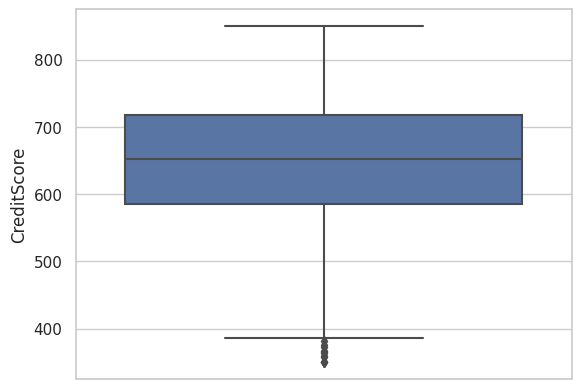

In [ ]:
## CreditScore
sns.set(style="whitegrid")
sns.boxplot(y = df_train['CreditScore'])

<Axes: ylabel='Age'>

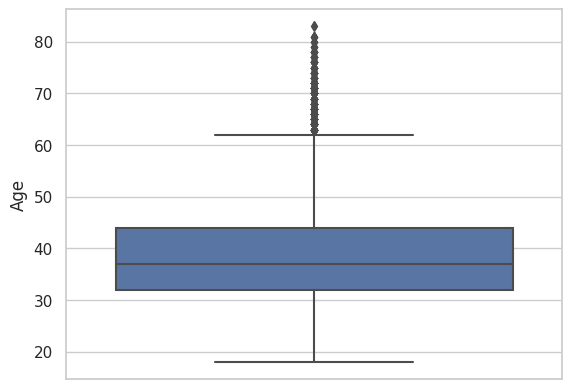

In [ ]:
## Age
sns.boxplot(y = df_train['Age'])

<Axes: ylabel='Tenure'>

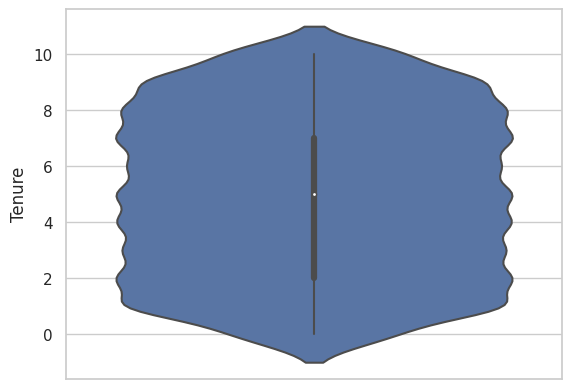

In [ ]:
## Tenure
sns.violinplot(y = df_train.Tenure)

<Axes: ylabel='Balance'>

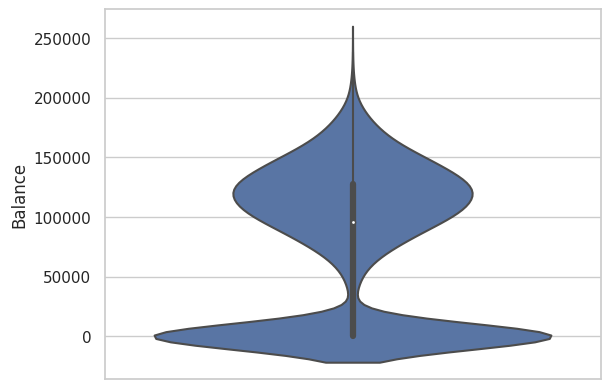

In [ ]:
## Balance
sns.violinplot(y = df_train['Balance'])

<Axes: xlabel='NumOfProducts'>

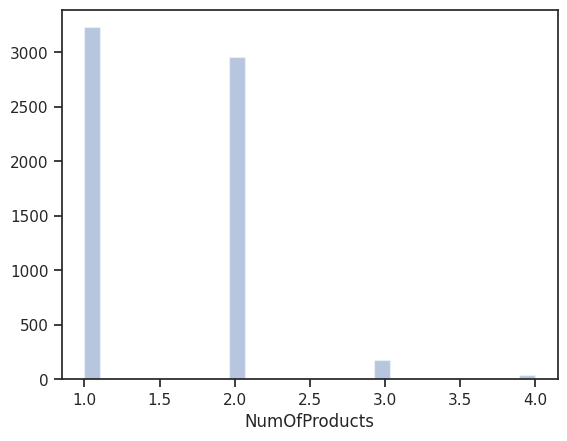

In [ ]:
## NumOfProducts
sns.set(style = 'ticks')
sns.distplot(df_train.NumOfProducts, hist=True, kde=False)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

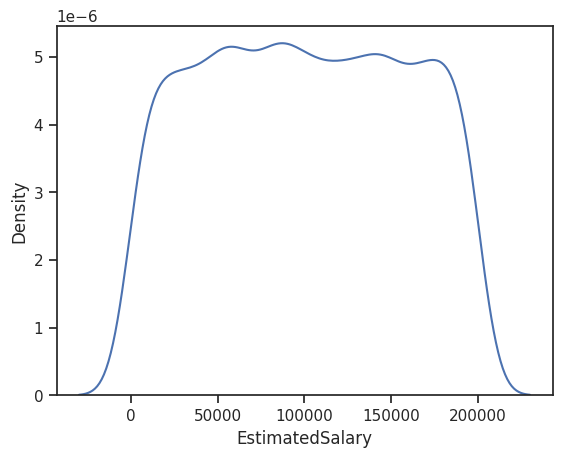

In [ ]:
## EstimatedSalary
sns.kdeplot(df_train.EstimatedSalary)

### Missing values and outlier treatment

__Outliers__
* Can be observed from univariate plots of different features

* Outliers can either be logically improbable (as per the feature definition) or just an extreme value as compared to the feature distribution

* As part of outlier treatment, the particular row containing the outlier can be removed from the training set, provided they do not form a significant chunk of the dataset (< 0.5-1%)

* In cases where the value of outlier is logically faulty, e.g. negative Age or CreditScore > 900, the particular record can be replaced with mean of the feature or the nearest among min/max logical value of the feature

Outliers in numerical features can be of a very high/low value, lying in the top 1% or bottom 1% of the distribution or values which are not possible as per the feature definition.

Outliers in categorical features are usually levels with a very low frequency/no. of samples as compared to other categorical levels.

__No outliers observed in any feature of this dataset__

##### Is outlier treatment always required ?

No, Not all ML algorithms are sensitive to outliers. Algorithms like linear/logistic regression are sensitive to outliers.

Tree algorithms, kNN, clustering algorithms etc. are in general, robust to outliers

Outliers affect metrics such as mean, std. deviation

__Missing Values__

In [ ]:
## No missing values!
df_train.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing value in this dataset

In [ ]:
## Making all changes in a temporary dataframe
df_missing = df_train.copy()

In [ ]:
## Modify few records to add missing values/outliers

# Introducing 10% nulls in Age
na_idx = df_missing.sample(frac = 0.1).index
df_missing.loc[na_idx, 'Age'] = np.NaN

# Introducing 30% nulls in Geography
na_idx = df_missing.sample(frac = 0.3).index
df_missing.loc[na_idx, 'Geography'] = np.NaN

# Introducing 5% nulls in HasCrCard
na_idx = df_missing.sample(frac = 0.05).index
df_missing.loc[na_idx, 'HasCrCard'] = np.NaN

In [ ]:
df_missing.isnull().sum()/df_missing.shape[0]

Surname            0.00
CreditScore        0.00
Geography          0.30
Gender             0.00
Age                0.10
Tenure             0.00
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.05
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

In [ ]:
## Calculating mean statistics
age_mean = df_missing.Age.mean()

In [ ]:
age_mean

38.842534722222226

In [ ]:
# Filling nulls in Age by mean value (numeric column)

#df_missing.Age.fillna(age_mean, inplace=True)

df_missing['Age'] = df_missing.Age.apply(lambda x: int(np.random.normal(age_mean,3)) if np.isnan(x) else x)

<Axes: xlabel='Age', ylabel='Density'>

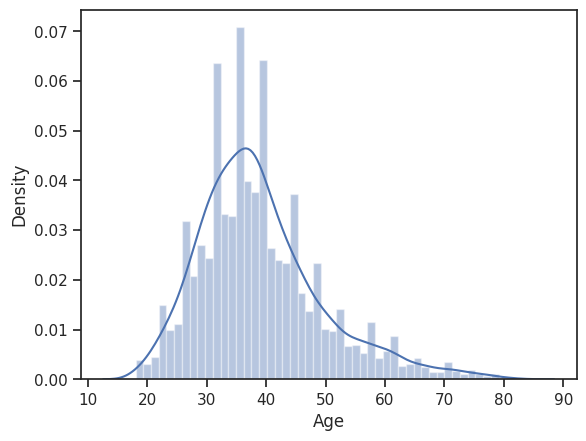

In [ ]:
## Distribution of "Age" feature before data imputation
sns.distplot(df_train.Age)

<Axes: xlabel='Age', ylabel='Density'>

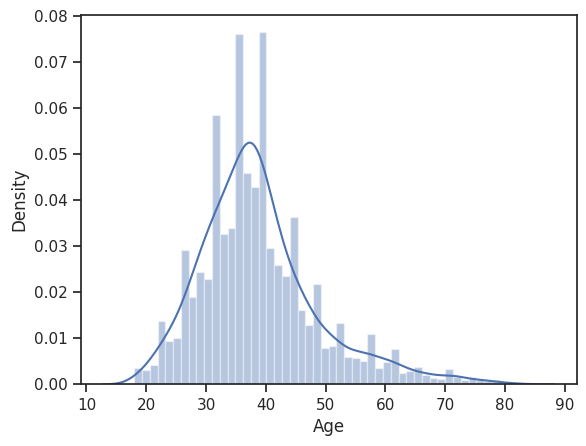

In [ ]:
## Distribution of "Age" feature after data imputation
sns.distplot(df_missing.Age)

In [ ]:
# Filling nulls in Geography (categorical feature with a high %age of missing values)
geog_fill_value = 'UNK'
df_missing.Geography.fillna(geog_fill_value, inplace=True)

# Filling nulls in HasCrCard (boolean feature) - 0 for few nulls, -1 for lots of nulls
df_missing.HasCrCard.fillna(0, inplace=True)

In [ ]:
df_missing.Geography.value_counts(normalize=True)

France     0.350313
UNK        0.300000
Germany    0.181875
Spain      0.167813
Name: Geography, dtype: float64

In [ ]:
df_missing.isnull().sum()/df_missing.shape[0]

Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

### Categorical variable encoding

As a rule of thumb, we can consider using :

 1. Label Encoding ---> Binary categorical variables and Ordinal variables
 2. One-Hot Encoding ---> Non-ordinal categorical variables with low to mid cardinality (< 5-10 levels)
 3. Target encoding ---> Categorical variables with > 10 levels

* HasCrCard and IsActiveMember are already label encoded
* For Gender, a simple Label encoding should be fine.
* For Geography, since there are 3 levels, OneHotEncoding should do the trick
* For Surname, we'll try Target/Frequency Encoding

#### Label Encoding for binary classification

Label encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by ML models which only takes numerical data



In [ ]:
## The non-sklearn method
df_train['Gender_cat'] = df_train.Gender.astype('category').cat.codes

In [ ]:
df_train.sample(10)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_cat
3756,Fomina,755,France,Male,31,5,0.00,2,0,1,194660.78,0,1
6769,Trevisan,762,France,Female,44,7,159316.64,1,0,0,24780.13,0,0
2789,Hayward,705,Spain,Male,44,0,184552.12,1,1,0,68860.30,1,1
6996,Pavlova,623,Spain,Female,50,2,87116.71,1,1,1,104382.11,0,0
9957,Oluchi,633,France,Male,25,1,0.00,1,1,0,100598.98,0,1
651,Christian,720,France,Male,52,7,0.00,1,1,1,14781.12,0,1
2521,Nwoye,638,Germany,Male,25,4,148045.45,2,1,1,114722.42,0,1
8677,Timperley,609,Germany,Female,40,10,137389.77,2,1,0,170122.22,0,0
6767,Piccio,608,Spain,Male,48,7,75801.74,1,1,0,125762.95,0,1
6710,Barton,578,France,Male,39,2,0.00,2,1,0,70563.90,0,1


In [ ]:
df_train.drop('Gender_cat', axis=1, inplace = True)

In [ ]:
## The sklearn method
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
## Label encoding of Gender variable
df_train['Gender'] = le.fit_transform(df_train['Gender'])

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Female': 0, 'Male': 1}

In [ ]:
## What if Gender column has new values in test or val set?
le.transform([['Male']])
#le.transform([['ABC']])

array([1])

In [ ]:
pd.Series(['ABC']).map(le_name_mapping)

0   NaN
dtype: float64

In [ ]:
## Encoding Gender feature for validation and test set
df_val['Gender'] = df_val.Gender.map(le_name_mapping)
df_test['Gender'] = df_test.Gender.map(le_name_mapping)

## Filling missing/NaN values created due to new categorical levels
df_val['Gender'].fillna(-1, inplace=True)
df_test['Gender'].fillna(-1, inplace=True)

In [ ]:
df_train.Gender.unique(), df_val.Gender.unique(), df_test.Gender.unique()

(array([1, 0]), array([0, 1]), array([1, 0]))

#### One-Hot encoding for categorical variables with multiple levels

A technique used to represent categorical variables as numerical values in an ML model

In [ ]:
## The non-sklearn method
t = pd.get_dummies(df_train, prefix_sep = "_", columns = ['Geography'])
t.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2579,Ozoemena,365,1,30,0,127760.07,1,1,0,81537.85,1,0,1,0
7128,Henry,553,1,38,1,181110.13,2,1,0,184544.59,0,0,0,1
4082,Romani,778,0,29,6,150358.97,1,1,0,62454.01,1,0,1,0
2550,Wang,850,1,42,0,0.00,2,1,0,44165.84,0,1,0,0
4926,Sung,674,0,36,6,100762.64,1,1,0,182156.86,0,0,1,0


In [ ]:
### Dropping dummy column
t.drop(['Geography_France'], axis=1, inplace=True)
t.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
2579,Ozoemena,365,1,30,0,127760.07,1,1,0,81537.85,1,1,0
7128,Henry,553,1,38,1,181110.13,2,1,0,184544.59,0,0,1
4082,Romani,778,0,29,6,150358.97,1,1,0,62454.01,1,1,0
2550,Wang,850,1,42,0,0.00,2,1,0,44165.84,0,0,0
4926,Sung,674,0,36,6,100762.64,1,1,0,182156.86,0,1,0


In [ ]:
## The sklearn method
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
le_ohe = LabelEncoder()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

In [ ]:
enc_train = le_ohe.fit_transform(df_train.Geography).reshape(df_train.shape[0],1)
enc_train.shape
np.unique(enc_train)

(6400, 1)

array([0, 1, 2])

In [ ]:
ohe_train = ohe.fit_transform(enc_train)
ohe_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
le_ohe_name_mapping = dict(zip(le_ohe.classes_, le_ohe.transform(le_ohe.classes_)))
le_ohe_name_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [ ]:
## Encoding Geography feature for validation and test set
enc_val = df_val.Geography.map(le_ohe_name_mapping).ravel().reshape(-1,1)
enc_test = df_test.Geography.map(le_ohe_name_mapping).ravel().reshape(-1,1)

## Filling missing/NaN values created due to new categorical levels
enc_val[np.isnan(enc_val)] = 9999
enc_test[np.isnan(enc_test)] = 9999

In [ ]:
np.unique(enc_val)
np.unique(enc_test)

array([0, 1, 2])

array([0, 1, 2])

In [ ]:
ohe_val = ohe.transform(enc_val)
ohe_test = ohe.transform(enc_test)

In [ ]:
### Show what happens when a new value is inputted into the OHE
ohe.transform(np.array([[9999]]))

array([[0., 0., 0.]])

#### Adding the one-hot encoded columns to the dataframe and removing the original feature

In [ ]:
cols = ['country_' + str(x) for x in le_ohe_name_mapping.keys()]
cols

['country_France', 'country_Germany', 'country_Spain']

In [ ]:
## Adding to the respective dataframes
df_train = pd.concat([df_train.reset_index(), pd.DataFrame(ohe_train, columns = cols)], axis = 1).drop(['index'], axis=1)
df_val = pd.concat([df_val.reset_index(), pd.DataFrame(ohe_val, columns = cols)], axis = 1).drop(['index'], axis=1)
df_test = pd.concat([df_test.reset_index(), pd.DataFrame(ohe_test, columns = cols)], axis = 1).drop(['index'], axis=1)

In [ ]:
print("Training set")
df_train.head()
print("\n\nValidation set")
df_val.head()
print("\n\nTest set")
df_test.head()

Training set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Ozoemena,365,Germany,1,30,0,127760.07,1,1,0,81537.85,1,0.0,1.0,0.0
1,Henry,553,Spain,1,38,1,181110.13,2,1,0,184544.59,0,0.0,0.0,1.0
2,Romani,778,Germany,0,29,6,150358.97,1,1,0,62454.01,1,0.0,1.0,0.0
3,Wang,850,France,1,42,0,0.00,2,1,0,44165.84,0,1.0,0.0,0.0
4,Sung,674,Germany,0,36,6,100762.64,1,1,0,182156.86,0,0.0,1.0,0.0




Validation set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Anenechukwu,801,France,0,32,4,75170.54,1,1,1,37898.50,0,1.0,0.0,0.0
1,Lu,766,Germany,0,28,4,90696.78,1,0,1,21597.20,0,0.0,1.0,0.0
2,Palmer,828,Spain,1,28,8,134766.85,1,1,0,79355.87,0,0.0,0.0,1.0
3,Ku,798,France,1,36,1,0.00,2,1,1,159044.10,0,1.0,0.0,0.0
4,Wan,611,Spain,1,34,4,0.00,2,1,0,170950.58,0,0.0,0.0,1.0




Test set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Anderson,596,Germany,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0
1,Herring,623,France,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0
2,Amechi,601,Spain,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0
3,Liang,506,Germany,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0
4,Chuang,560,Spain,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0


In [ ]:
## Drop the Geography column
df_train.drop(['Geography'], axis = 1, inplace=True)
df_val.drop(['Geography'], axis = 1, inplace=True)
df_test.drop(['Geography'], axis = 1, inplace=True)

#### Target encoding

Target encoding is generally useful when dealing with categorical variables of high cardinality (high number of levels).

Here, we'll encode the column 'Surname' (which has 2932 different values!) with the mean of target variable for that level

In [ ]:
df_train.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Ozoemena,365,1,30,0,127760.07,1,1,0,81537.85,1,0.0,1.0,0.0
1,Henry,553,1,38,1,181110.13,2,1,0,184544.59,0,0.0,0.0,1.0
2,Romani,778,0,29,6,150358.97,1,1,0,62454.01,1,0.0,1.0,0.0
3,Wang,850,1,42,0,0.00,2,1,0,44165.84,0,1.0,0.0,0.0
4,Sung,674,0,36,6,100762.64,1,1,0,182156.86,0,0.0,1.0,0.0


In [ ]:
means = df_train.groupby(['Surname']).Exited.mean()
means.head()

Surname
Abazu        0.000000
Abbott       0.333333
Abdullah     1.000000
Abel         0.000000
Abernathy    0.000000
Name: Exited, dtype: float64

In [ ]:
global_mean = y_train.mean()
global_mean

0.20578125

In [ ]:
## Creating new encoded features for surname - Target (mean) encoding
df_train['Surname_mean_churn'] = df_train.Surname.map(means)
df_train['Surname_mean_churn'].fillna(global_mean, inplace=True)

In [ ]:
## Calculate frequency of each category
freqs = df_train.groupby(['Surname']).size()
freqs.head()

Surname
Abazu        2
Abbott       3
Abdullah     1
Abel         1
Abernathy    2
dtype: int64

In [ ]:
## Create frequency encoding - Number of instances of each category in the data
df_train['Surname_freq'] = df_train.Surname.map(freqs)
df_train['Surname_freq'].fillna(0, inplace=True)

In [ ]:
## Create Leave-one-out target encoding for Surname
df_train['Surname_enc'] = ((df_train.Surname_freq * df_train.Surname_mean_churn) - df_train.Exited)/(df_train.Surname_freq - 1)
df_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_enc
0,Ozoemena,365,1,30,0,127760.07,1,1,0,81537.85,1,0.0,1.0,0.0,1.000000,2,1.000000
1,Henry,553,1,38,1,181110.13,2,1,0,184544.59,0,0.0,0.0,1.0,0.333333,3,0.500000
2,Romani,778,0,29,6,150358.97,1,1,0,62454.01,1,0.0,1.0,0.0,0.400000,5,0.250000
3,Wang,850,1,42,0,0.00,2,1,0,44165.84,0,1.0,0.0,0.0,0.266667,15,0.285714
4,Sung,674,0,36,6,100762.64,1,1,0,182156.86,0,0.0,1.0,0.0,0.266667,15,0.285714
5,Moran,470,0,48,6,140576.11,1,1,1,116971.05,0,0.0,0.0,1.0,0.000000,6,0.000000
6,Miller,738,1,49,3,0.00,3,1,1,65066.48,1,0.0,0.0,1.0,0.363636,11,0.300000
7,Chinonyelum,604,1,34,7,0.00,2,1,1,188078.55,0,1.0,0.0,0.0,0.000000,2,0.000000
8,Ellis,635,0,48,4,81556.89,2,1,0,191914.37,0,0.0,1.0,0.0,0.200000,5,0.250000
9,Runyon,730,1,38,5,118866.36,1,1,1,163317.50,0,0.0,0.0,1.0,0.000000,1,NaN


In [ ]:
## Fill NaNs occuring due to category frequency being 1 or less
df_train['Surname_enc'].fillna((((df_train.shape[0] * global_mean) - df_train.Exited) / (df_train.shape[0] - 1)), inplace=True)
df_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_mean_churn,Surname_freq,Surname_enc
0,Ozoemena,365,1,30,0,127760.07,1,1,0,81537.85,1,0.0,1.0,0.0,1.000000,2,1.000000
1,Henry,553,1,38,1,181110.13,2,1,0,184544.59,0,0.0,0.0,1.0,0.333333,3,0.500000
2,Romani,778,0,29,6,150358.97,1,1,0,62454.01,1,0.0,1.0,0.0,0.400000,5,0.250000
3,Wang,850,1,42,0,0.00,2,1,0,44165.84,0,1.0,0.0,0.0,0.266667,15,0.285714
4,Sung,674,0,36,6,100762.64,1,1,0,182156.86,0,0.0,1.0,0.0,0.266667,15,0.285714
5,Moran,470,0,48,6,140576.11,1,1,1,116971.05,0,0.0,0.0,1.0,0.000000,6,0.000000
6,Miller,738,1,49,3,0.00,3,1,1,65066.48,1,0.0,0.0,1.0,0.363636,11,0.300000
7,Chinonyelum,604,1,34,7,0.00,2,1,1,188078.55,0,1.0,0.0,0.0,0.000000,2,0.000000
8,Ellis,635,0,48,4,81556.89,2,1,0,191914.37,0,0.0,1.0,0.0,0.200000,5,0.250000
9,Runyon,730,1,38,5,118866.36,1,1,1,163317.50,0,0.0,0.0,1.0,0.000000,1,0.205813


On validation and test set, we'll apply the normal Target encoding mapping as obtained from the training set

In [ ]:
## Replacing by category means and new category levels by global mean
df_val['Surname_enc'] = df_val.Surname.map(means)
df_val['Surname_enc'].fillna(global_mean, inplace=True)

df_test['Surname_enc'] = df_test.Surname.map(means)
df_test['Surname_enc'].fillna(global_mean, inplace=True)

In [ ]:
## Show that using LOO Target encoding decorrelates features
df_train[['Surname_mean_churn', 'Surname_enc', 'Exited']].corr()

,Surname_mean_churn,Surname_enc,Exited
Surname_mean_churn,1.000000,0.544859,0.585578
Surname_enc,0.544859,1.000000,-0.029009
Exited,0.585578,-0.029009,1.000000


In [ ]:
### Deleting the 'Surname' and other redundant column across the three datasets
df_train.drop(['Surname_mean_churn'], axis=1, inplace=True)
df_train.drop(['Surname_freq'], axis=1, inplace=True)
df_train.drop(['Surname'], axis=1, inplace=True)
df_val.drop(['Surname'], axis=1, inplace=True)
df_test.drop(['Surname'], axis=1, inplace=True)

In [ ]:
df_train.head()
df_val.head()
df_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,365,1,30,0,127760.07,1,1,0,81537.85,1,0.0,1.0,0.0,1.000000
1,553,1,38,1,181110.13,2,1,0,184544.59,0,0.0,0.0,1.0,0.500000
2,778,0,29,6,150358.97,1,1,0,62454.01,1,0.0,1.0,0.0,0.250000
3,850,1,42,0,0.00,2,1,0,44165.84,0,1.0,0.0,0.0,0.285714
4,674,0,36,6,100762.64,1,1,0,182156.86,0,0.0,1.0,0.0,0.285714


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,801,0,32,4,75170.54,1,1,1,37898.50,0,1.0,0.0,0.0,0.333333
1,766,0,28,4,90696.78,1,0,1,21597.20,0,0.0,1.0,0.0,0.230769
2,828,1,28,8,134766.85,1,1,0,79355.87,0,0.0,0.0,1.0,0.400000
3,798,1,36,1,0.00,2,1,1,159044.10,0,1.0,0.0,0.0,0.222222
4,611,1,34,4,0.00,2,1,0,170950.58,0,0.0,0.0,1.0,0.076923


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,596,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0,0.000000
1,623,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0,0.205781
2,601,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0,0.500000
3,506,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0,0.083333
4,560,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0,0.250000


#### _Summarize_ : How to handle unknown categorical levels/values in unseen data in production?

 - Use LabelEncoding, OneHotEncoding on training set and then save the mapping and apply on the test set. For missing values, use 0, -1 etc.

 - Target/Frequency encoding : Create a mapping between each level and a statistical measure (mean, median, sum etc.) of the target from the training dataset. For the new categorical levels, impute the missing values suitably (can be 0, -1, or mean/mode/median)

 - Leave-one-out or Cross fold Target encoding avoid data leakage and help in generalization of the model

### __Bivariate analysis__

It is an analysis of any concurrent relationship between two variables or attributes.

In [ ]:
## Check linear correlation (rho) between individual features and the target variable
corr = df_train.corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
CreditScore,1.000000,-0.009033,-0.003227,-0.002797,0.008093,0.025163,-0.018183,0.020058,-0.002031,-0.028383,-0.005846,0.001039,0.005746,-0.005197
Gender,-0.009033,1.000000,-0.025402,0.012088,0.012751,-0.021025,0.004601,0.019816,-0.016488,-0.100644,-0.003000,-0.012690,0.016295,-0.001436
Age,-0.003227,-0.025402,1.000000,-0.001657,0.021437,-0.035967,-0.017947,0.094476,-0.007548,0.278809,-0.036857,0.041098,0.001359,-0.019499
Tenure,-0.002797,0.012088,-0.001657,1.000000,-0.005990,0.016807,0.018528,-0.019457,0.021738,-0.009469,-0.009408,0.010590,0.000246,0.006650
Balance,0.008093,0.012751,0.021437,-0.005990,1.000000,-0.300809,-0.012981,-0.032976,0.010088,0.119943,-0.224627,0.409776,-0.152504,0.005115
NumOfProducts,0.025163,-0.021025,-0.035967,0.016807,-0.300809,1.000000,0.005625,0.009174,0.006017,-0.048684,-0.010283,-0.018708,0.030834,-0.001412
HasCrCard,-0.018183,0.004601,-0.017947,0.018528,-0.012981,0.005625,1.000000,-0.019598,-0.010739,-0.002699,0.007762,0.009342,-0.018451,0.009108
IsActiveMember,0.020058,0.019816,0.094476,-0.019457,-0.032976,0.009174,-0.019598,1.000000,-0.022356,-0.148096,-0.000805,-0.033274,0.034519,-0.012032
EstimatedSalary,-0.002031,-0.016488,-0.007548,0.021738,0.010088,0.006017,-0.010739,-0.022356,1.000000,0.002585,-0.009876,0.027331,-0.016107,-0.008564
Exited,-0.028383,-0.100644,0.278809,-0.009469,0.119943,-0.048684,-0.002699,-0.148096,0.002585,1.000000,-0.109152,0.174542,-0.049299,-0.029009


<Axes: >

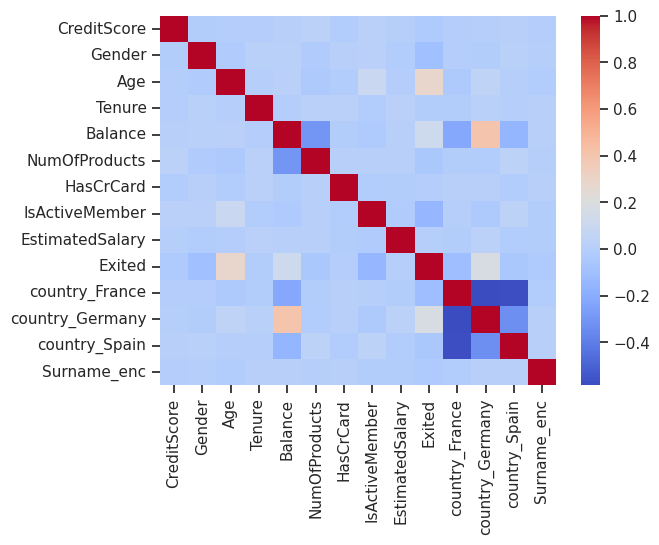

In [ ]:
sns.heatmap(corr, cmap = 'coolwarm')

None of the features are highly correlated with the target variable. But some of them have slight linear associations with the target variable.

* Continuous features - Age, Balance

* Categorical variables - Gender, IsActiveMember, country_Germany, country_France

### Individual features versus their distribution across target variable values

<Axes: xlabel='Exited', ylabel='Age'>

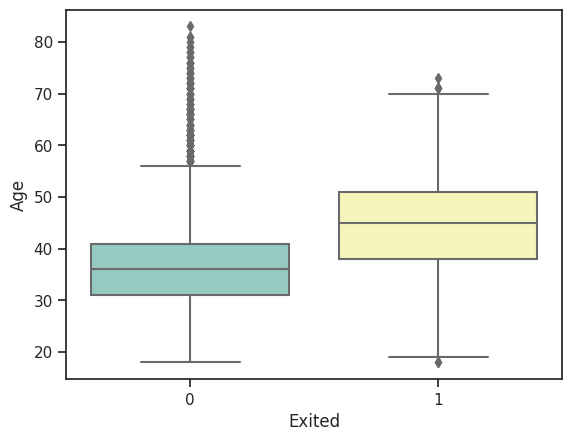

In [ ]:
sns.boxplot(x = "Exited", y = "Age", data = df_train, palette="Set3")

<Axes: xlabel='Exited', ylabel='Balance'>

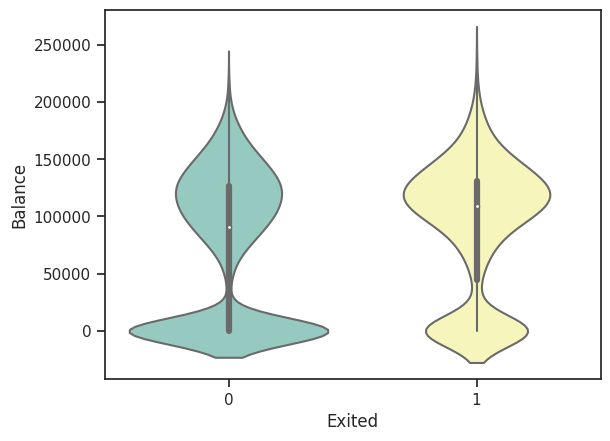

In [ ]:
sns.violinplot(x = "Exited", y = "Balance", data = df_train, palette="Set3")

In [ ]:
# Check association of categorical features with target variable
cat_vars_bv = ['Gender', 'IsActiveMember', 'country_Germany', 'country_France']

for col in cat_vars_bv:
    df_train.groupby([col]).Exited.mean()

Gender
0    0.250171
1    0.168488
Name: Exited, dtype: float64

IsActiveMember
0    0.267592
1    0.147789
Name: Exited, dtype: float64

country_Germany
0.0    0.164821
1.0    0.327340
Name: Exited, dtype: float64

country_France
0.0    0.250157
1.0    0.161902
Name: Exited, dtype: float64

In [ ]:
col = 'NumOfProducts'
df_train.groupby([col]).Exited.mean()
df_train[col].value_counts()

NumOfProducts
1    0.280805
2    0.076377
3    0.845714
4    1.000000
Name: Exited, dtype: float64

1    3230
2    2959
3     175
4      36
Name: NumOfProducts, dtype: int64

### Some basic feature engineering

In [ ]:
df_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc'],
      dtype='object')

Creating some new features based on simple interactions between the existing features.

* Balance/NumOfProducts
* Balance/EstimatedSalary
* Tenure/Age
* Age * Surname_enc

In [ ]:
eps = 1e-6

df_train['bal_per_product'] = df_train.Balance/(df_train.NumOfProducts + eps)
df_train['bal_by_est_salary'] = df_train.Balance/(df_train.EstimatedSalary + eps)
df_train['tenure_age_ratio'] = df_train.Tenure/(df_train.Age + eps)
df_train['age_surname_mean_churn'] = np.sqrt(df_train.Age) * df_train.Surname_enc

In [ ]:
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,365,1,30,0,127760.07,1,1,0,81537.85,1,0.0,1.0,0.0,1.000000,127759.942240,1.566881,0.000000,5.477226
1,553,1,38,1,181110.13,2,1,0,184544.59,0,0.0,0.0,1.0,0.500000,90555.019722,0.981390,0.026316,3.082207
2,778,0,29,6,150358.97,1,1,0,62454.01,1,0.0,1.0,0.0,0.250000,150358.819641,2.407515,0.206897,1.346291
3,850,1,42,0,0.00,2,1,0,44165.84,0,1.0,0.0,0.0,0.285714,0.000000,0.000000,0.000000,1.851640
4,674,0,36,6,100762.64,1,1,0,182156.86,0,0.0,1.0,0.0,0.285714,100762.539237,0.553164,0.166667,1.714286


In [ ]:
new_cols = ['bal_per_product','bal_by_est_salary','tenure_age_ratio','age_surname_mean_churn']

In [ ]:
## Ensuring that the new column doesn't have any missing values
df_train[new_cols].isnull().sum()

bal_per_product           0
bal_by_est_salary         0
tenure_age_ratio          0
age_surname_mean_churn    0
dtype: int64

<Axes: >

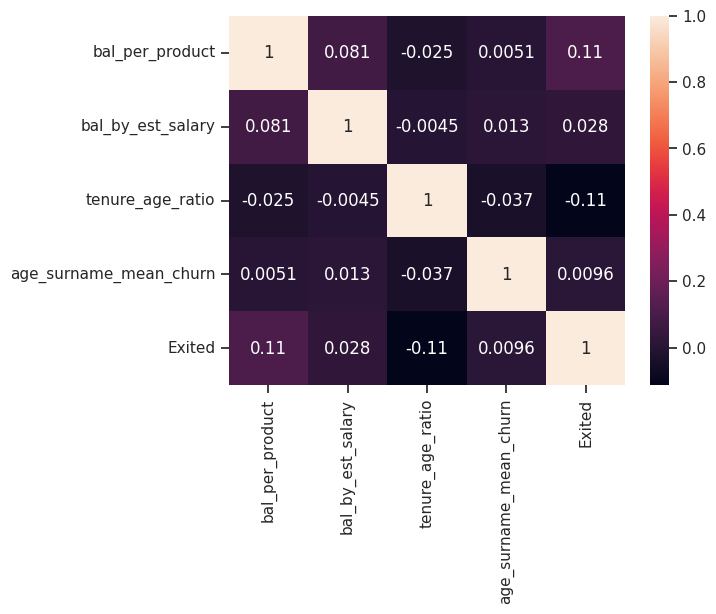

In [ ]:
## Linear association of new columns with target variables to judge importance
sns.heatmap(df_train[new_cols + ['Exited']].corr(), annot=True)

In [ ]:
## Creating new interaction feature terms for validation set
eps = 1e-6

df_val['bal_per_product'] = df_val.Balance/(df_val.NumOfProducts + eps)
df_val['bal_by_est_salary'] = df_val.Balance/(df_val.EstimatedSalary + eps)
df_val['tenure_age_ratio'] = df_val.Tenure/(df_val.Age + eps)
df_val['age_surname_mean_churn'] = np.sqrt(df_val.Age) * df_val.Surname_enc

In [ ]:
## Creating new interaction feature terms for test set
eps = 1e-6

df_test['bal_per_product'] = df_test.Balance/(df_test.NumOfProducts + eps)
df_test['bal_by_est_salary'] = df_test.Balance/(df_test.EstimatedSalary + eps)
df_test['tenure_age_ratio'] = df_test.Tenure/(df_test.Age + eps)
df_test['age_surname_mean_churn'] = np.sqrt(df_test.Age) * df_test.Surname_enc

### Feature scaling and normalization

Different methods :

1. Feature transformations - Using log, log10, sqrt, pow
2. MinMaxScaler - Brings all feature values between 0 and 1
3. StandardScaler - Mean normalization. Feature values are an estimate of their z-score


* Why is scaling and normalization required ?


are scaling and normalization required ?


* How do we normalize unseen data

#### Feature transformations

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

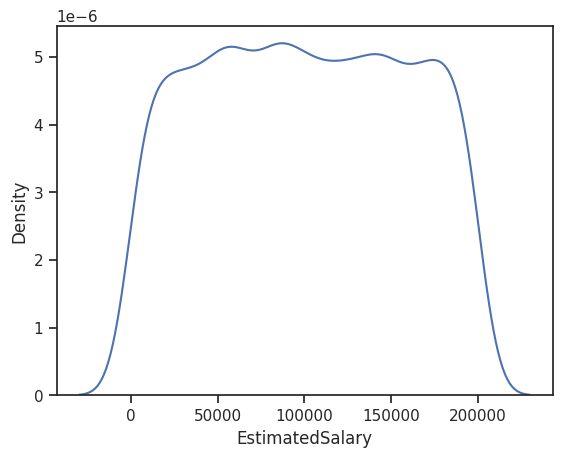

In [ ]:
### Demo-ing feature transformations
sns.distplot(df_train.EstimatedSalary, hist=False)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

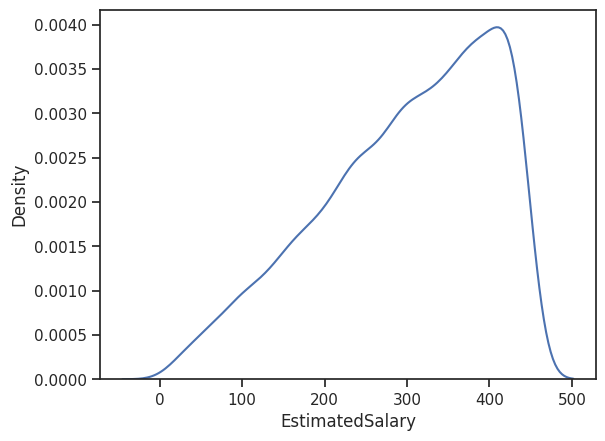

In [ ]:
sns.distplot(np.sqrt(df_train.EstimatedSalary), hist=False)
#sns.distplot(np.log10(1+df_train.EstimatedSalary), hist=False)

#### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
df_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc',
       'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio',
       'age_surname_mean_churn'],
      dtype='object')

In [ ]:
# scaling only continuous variable
cont_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Surname_enc', 'bal_per_product'
             , 'bal_by_est_salary', 'tenure_age_ratio', 'age_surname_mean_churn']
cat_vars = ['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain']

In [ ]:
## Scaling only continuous columns
cols_to_scale = cont_vars

In [ ]:
sc_X_train = sc.fit_transform(df_train[cols_to_scale])

In [ ]:
## Converting from array to dataframe and naming the respective features/columns
sc_X_train = pd.DataFrame(data = sc_X_train, columns = cols_to_scale)
sc_X_train.shape
sc_X_train.head()

(6400, 11)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,-2.973704,-0.851720,-1.730353,0.823810,-0.919316,-0.326298,3.928012,1.150103,-0.053860,-1.538187,3.321415
1,-1.022003,-0.089168,-1.383045,1.676938,0.802552,1.465331,1.445253,0.494812,-0.080948,-1.242747,1.421895
2,1.313811,-0.947039,0.353494,1.185192,-0.919316,-0.658229,0.203874,1.548138,-0.014968,0.784584,0.045118
3,2.061271,0.292108,-1.730353,-1.219219,0.802552,-0.976321,0.381213,-1.100135,-0.126353,-1.538187,0.445917
4,0.234146,-0.279806,0.353494,0.392090,-0.919316,1.423800,0.381213,0.674598,-0.100760,0.332934,0.336979


In [ ]:
## Mapping learnt on the continuous features
sc_map = {'mean':sc.mean_, 'std':np.sqrt(sc.var_)}
sc_map

{'mean': array([6.51445625e+02, 3.89354687e+01, 4.98218750e+00, 7.62434299e+04,
        1.53390625e+00, 1.00297819e+05, 2.08942144e-01, 6.24614729e+04,
        2.73103031e+00, 1.37011184e-01, 1.28940351e+00]),
 'std': array([9.63261980e+01, 1.04910851e+01, 2.87928945e+00, 6.25346262e+04,
        5.80764898e-01, 5.74933561e+04, 2.01388857e-01, 5.67761715e+04,
        2.16143659e+01, 8.90731471e-02, 1.26085494e+00])}

In [ ]:
## Scaling validation and test sets by transforming the mapping obtained through the training set
sc_X_val = sc.transform(df_val[cols_to_scale])
sc_X_test = sc.transform(df_test[cols_to_scale])

In [ ]:
## Converting val and test arrays to dataframes for re-usability
sc_X_val = pd.DataFrame(data = sc_X_val, columns = cols_to_scale)
sc_X_test = pd.DataFrame(data = sc_X_test, columns = cols_to_scale)

### Feature selection - RFE

Features shortlisted through EDA/manual inspection and bivariate analysis :

_Age, Gender, Balance, NumOfProducts, IsActiveMember, the 3 country/Geography variables, bal per product, tenure age ratio_

Now, let's see whether feature selection/elimination through RFE (Recursive Feature Elimination) gives us the same list of features, other extra features or lesser number of features.

To begin with, we'll feed all features to RFE + LogReg model.

In [ ]:
cont_vars
cat_vars

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain']

In [ ]:
## Creating feature-set and target for RFE model
y = df_train['Exited'].values
#X = pd.concat([df_train[cat_vars], sc_X_train[cont_vars]], ignore_index=True, axis = 1)
X = df_train[cat_vars + cont_vars]
X.columns = cat_vars + cont_vars

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# for logistics regression
est = LogisticRegression()

In [ ]:
# for decision trees
est_dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')

In [ ]:
# for logistics regression
rfe = RFE(est, n_features_to_select=10)
rfe = rfe.fit(X.values, y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True False  True False False  True False
  True False False  True  True]
[1 2 1 1 1 1 5 1 3 6 1 7 1 8 4 1 1]


In [ ]:
# for decision trees
rfe_dt = RFE(est_dt, n_features_to_select=10)
rfe_dt = rfe_dt.fit(X.values, y)
print(rfe_dt.support_)
print(rfe_dt.ranking_)

[False False  True False False False False  True False  True  True  True
  True  True  True  True  True]
[8 7 1 6 5 4 3 1 2 1 1 1 1 1 1 1 1]


In [ ]:
## Logistic Regression (Linear model)
mask = rfe.support_.tolist()
selected_feats = [b for a,b in zip(mask, X.columns) if a]
selected_feats

['Gender',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'NumOfProducts',
 'Surname_enc',
 'tenure_age_ratio',
 'age_surname_mean_churn']

In [ ]:
## Decision Tree (Non-linear model)
mask = rfe_dt.support_.tolist()
selected_feats_dt = [b for a,b in zip(mask, X.columns) if a]
selected_feats_dt

['IsActiveMember',
 'Age',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

### Baseline model : Logistic Regression

In [ ]:
## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [ ]:
selected_cat_vars = [x for x in selected_feats if x in cat_vars]
selected_cont_vars = [x for x in selected_feats if x in cont_vars]

In [ ]:
## Using categorical features and scaled numerical features
X_train = np.concatenate((df_train[selected_cat_vars].values, sc_X_train[selected_cont_vars].values), axis = 1)
X_val = np.concatenate((df_val[selected_cat_vars].values, sc_X_val[selected_cont_vars].values), axis = 1)
X_test = np.concatenate((df_test[selected_cat_vars].values, sc_X_test[selected_cont_vars].values), axis = 1)

X_train.shape, X_val.shape, X_test.shape

((6400, 10), (1600, 10), (2000, 10))

 __Solving class imbalance__

In [ ]:
# Obtaining class weights based on the class samples imbalance ratio
_, num_samples = np.unique(y_train, return_counts = True)
weights = np.max(num_samples)/num_samples
weights
num_samples

array([1.        , 3.85952923])

array([5083, 1317])

In [ ]:
weights_dict = dict()
class_labels = [0,1]
for a,b in zip(class_labels,weights):
    weights_dict[a] = b

weights_dict

{0: 1.0, 1: 3.859529233105543}

In [ ]:
## Defining model
lr = LogisticRegression(C = 1.0, penalty = 'l2', class_weight = weights_dict, n_jobs = -1)

In [ ]:
## Fitting model
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.0, 1: 3.859529233105543}, n_jobs=-1)

In [ ]:
## Fitted model parameters
selected_cat_vars + selected_cont_vars

lr.coef_
lr.intercept_

['Gender',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'NumOfProducts',
 'Surname_enc',
 'tenure_age_ratio',
 'age_surname_mean_churn']

array([[-0.51085818, -0.87123948, -0.35243699,  0.57818684, -0.22689159,
         0.71977504, -0.0736928 , -0.55245011, -0.03407138,  0.4604145 ]])

array([0.54500555])

In [ ]:
## Training metrics
roc_auc_score(y_train, lr.predict(X_train))
recall_score(y_train, lr.predict(X_train))
confusion_matrix(y_train, lr.predict(X_train))
print(classification_report(y_train, lr.predict(X_train)))

0.6970445502158474

0.6856492027334852

array([[3601, 1482],
       [ 414,  903]])

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      5083
           1       0.38      0.69      0.49      1317

    accuracy                           0.70      6400
   macro avg       0.64      0.70      0.64      6400
weighted avg       0.79      0.70      0.73      6400



In [ ]:
## Validation metrics
roc_auc_score(y_val, lr.predict(X_val))
recall_score(y_val, lr.predict(X_val))
confusion_matrix(y_val, lr.predict(X_val))
print(classification_report(y_val, lr.predict(X_val)))

0.7241292331197706

0.7247706422018348

array([[921, 352],
       [ 90, 237]])

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1273
           1       0.40      0.72      0.52       327

    accuracy                           0.72      1600
   macro avg       0.66      0.72      0.66      1600
weighted avg       0.81      0.72      0.75      1600



## Support Vector Model - SVM

In [ ]:
from sklearn.svm import SVC

## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [ ]:
## Using categorical features and scaled numerical features
X_train = np.concatenate((df_train[selected_cat_vars].values, sc_X_train[selected_cont_vars].values), axis = 1)
X_val = np.concatenate((df_val[selected_cat_vars].values, sc_X_val[selected_cont_vars].values), axis = 1)
X_test = np.concatenate((df_test[selected_cat_vars].values, sc_X_test[selected_cont_vars].values), axis = 1)

X_train.shape, X_val.shape, X_test.shape

((6400, 10), (1600, 10), (2000, 10))

In [ ]:
weights_dict = {0: 1.0, 1: 3.92}
weights_dict

{0: 1.0, 1: 3.92}

In [ ]:
svm = SVC(C = 1.0, kernel = "linear", class_weight = weights_dict)

In [ ]:
svm.fit(X_train, y_train)

SVC(class_weight={0: 1.0, 1: 3.92}, kernel='linear')

In [ ]:
## Fitted model parameters
selected_cat_vars + selected_cont_vars

svm.coef_
svm.intercept_

['Gender',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'NumOfProducts',
 'Surname_enc',
 'tenure_age_ratio',
 'age_surname_mean_churn']

array([[-0.45903283, -0.70249162, -0.34380192,  0.58031719, -0.23651527,
         0.80487831, -0.05491546, -0.40706873, -0.01870985,  0.33501104]])

array([0.43217501])

In [ ]:
## Training metrics
roc_auc_score(y_train, svm.predict(X_train))
recall_score(y_train, svm.predict(X_train))
confusion_matrix(y_train, svm.predict(X_train))
print(classification_report(y_train, svm.predict(X_train)))

0.7011621509666939

0.686408504176158

array([[3639, 1444],
       [ 413,  904]])

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      5083
           1       0.39      0.69      0.49      1317

    accuracy                           0.71      6400
   macro avg       0.64      0.70      0.65      6400
weighted avg       0.79      0.71      0.73      6400



In [ ]:
## Validation metrics
roc_auc_score(y_val, svm.predict(X_val))
recall_score(y_val, svm.predict(X_val))
confusion_matrix(y_val, svm.predict(X_val))
print(classification_report(y_val, svm.predict(X_val)))

0.7292352818236196

0.7247706422018348

array([[934, 339],
       [ 90, 237]])

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1273
           1       0.41      0.72      0.52       327

    accuracy                           0.73      1600
   macro avg       0.66      0.73      0.67      1600
weighted avg       0.81      0.73      0.75      1600



## Decision Boundaries For Linear Models

To plot decision boundaries of classification models in a 2-D space, we first need to train our models on a 2-D space. The best option is to use our existing data (with > 2 features) and apply dimensionality reduction techniques (like PCA) on it and then train our models on this data with a reduced number of features

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
## Transforming the dataset using PCA
X = pca.fit_transform(X_train)
y = y_train
X_train.shape
X.shape
y.shape

(6400, 10)

(6400, 2)

(6400,)

In [ ]:
## Checking the variance explained by the reduced features
pca.explained_variance_ratio_

array([0.32501319, 0.22638387])

In [ ]:
# Creating a mesh region where the boundary will be plotted
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [ ]:
## Fitting LR model on 2 features
lr.fit(X, y)

LogisticRegression(class_weight={0: 1.0, 1: 3.859529233105543}, n_jobs=-1)

In [ ]:
## Fitting SVM model on 2 features
svm.fit(X,y)

SVC(class_weight={0: 1.0, 1: 3.92}, kernel='linear')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [ ]:
weights_dict = {0: 1.0, 1: 3.92}
weights_dict


{0: 1.0, 1: 3.92}

In [ ]:
## Features selected from the RFE process
selected_feats_dt

['IsActiveMember',
 'Age',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

In [ ]:
## Re-defining X_train and X_val to consider original unscaled continuous features. y_train and y_val remain unaffected
X_train = df_train[selected_feats_dt].values
X_val = df_val[selected_feats_dt].values
X_train.shape, y_train.shape
X_val.shape, y_val.shape

((6400, 10), (6400,))

((1600, 10), (1600,))

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = weights_dict, max_depth = 4, max_features = None
                            , min_samples_split = 25, min_samples_leaf = 15)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92}, criterion='entropy',
                       max_depth=4, min_samples_leaf=15, min_samples_split=25)

In [ ]:
## Checking the importance of different features of the model
pd.DataFrame({'features': selected_feats,
              'importance': clf.feature_importances_
             }).sort_values(by = 'importance', ascending=False)

,features,importance
1,IsActiveMember,0.448199
3,country_Germany,0.378356
0,Gender,0.088262
7,Surname_enc,0.046765
5,Age,0.036244
4,country_Spain,0.002174
2,country_France,0.000000
6,NumOfProducts,0.000000
8,tenure_age_ratio,0.000000
9,age_surname_mean_churn,0.000000


In [ ]:
## Training metrics
roc_auc_score(y_train, clf.predict(X_train))
recall_score(y_train, clf.predict(X_train))
confusion_matrix(y_train, clf.predict(X_train))
print(classification_report(y_train, clf.predict(X_train)))

0.7424417539011857

0.8018223234624146

array([[3472, 1611],
       [ 261, 1056]])

              precision    recall  f1-score   support

           0       0.93      0.68      0.79      5083
           1       0.40      0.80      0.53      1317

    accuracy                           0.71      6400
   macro avg       0.66      0.74      0.66      6400
weighted avg       0.82      0.71      0.73      6400



In [ ]:
## Validation metrics
roc_auc_score(y_val, clf.predict(X_val))
recall_score(y_val, clf.predict(X_val))
confusion_matrix(y_val, clf.predict(X_val))
print(classification_report(y_val, clf.predict(X_val)))

0.7275945237597623

0.7584097859327217

array([[887, 386],
       [ 79, 248]])

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1273
           1       0.39      0.76      0.52       327

    accuracy                           0.71      1600
   macro avg       0.65      0.73      0.65      1600
weighted avg       0.81      0.71      0.74      1600



#### Plot decision boundaries of non-linear model

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
## Transforming the dataset using PCA
X = pca.fit_transform(X_train)
y = y_train
X_train.shape
X.shape
y.shape

(6400, 10)

(6400, 2)

(6400,)

In [ ]:
## Checking the variance explained by the reduced features
pca.explained_variance_ratio_


array([0.65006691, 0.31658916])

In [ ]:
# Creating a mesh region where the boundary will be plotted
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 100),
                     np.arange(y_min, y_max, 100))

In [ ]:
## Fitting tree model on 2 features
clf.fit(X, y)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92}, criterion='entropy',
                       max_depth=4, min_samples_leaf=15, min_samples_split=25)

#### Decision tree rule engine visualization

In [ ]:
from sklearn.tree import export_graphviz
import subprocess

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = weights_dict, max_depth = 3, max_features = None
                            , min_samples_split = 25, min_samples_leaf = 15)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92}, criterion='entropy',
                       max_depth=3, min_samples_leaf=15, min_samples_split=25)

In [ ]:
## Export as dot file
dot_data = export_graphviz(clf, out_file = 'tree.dot'
                          , feature_names = selected_feats_dt
                          , class_names = ['Did not churn', 'Churned']
                          , rounded = True, proportion = False
                          , precision = 2, filled = True)

In [ ]:
## Convert to png using system command (requires Graphviz)
#subprocess.run(['dot', '-Tpng','tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [ ]:
## Display the rule-set of a single tree
#from IPython.display import Image
#Image(filename = 'tree.png')

### Spot-checking various ML algorithms

__Steps__ :

- Automate data preparation and model run through Pipelines

- Model Zoo : List of all models to compare/spot-check

- Evaluate using k-fold Cross validation framework

__Note__ : Restart the kernel and read the original dataset again followed by train-test split and then come directly to this section of the notebook

#### Automating data preparation and model run through Pipelines

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """
    Encodes categorical columns using LabelEncoding, OneHotEncoding and TargetEncoding.
    LabelEncoding is used for binary categorical columns
    OneHotEncoding is used for columns with <= 10 distinct values
    TargetEncoding is used for columns with higher cardinality (>10 distinct values)

    """

    def __init__(self, cols = None, lcols = None, ohecols = None, tcols = None, reduce_df = False):
        """

        Parameters
        ----------
        cols : list of str
            Columns to encode.  Default is to one-hot/target/label encode all categorical columns in the DataFrame.
        reduce_df : bool
            Whether to use reduced degrees of freedom for encoding
            (that is, add N-1 one-hot columns for a column with N
            categories). E.g. for a column with categories A, B,
            and C: When reduce_df is True, A=[1, 0], B=[0, 1],
            and C=[0, 0].  When reduce_df is False, A=[1, 0, 0],
            B=[0, 1, 0], and C=[0, 0, 1]
            Default = False

        """

        if isinstance(cols,str):
            self.cols = [cols]
        else :
            self.cols = cols

        if isinstance(lcols,str):
            self.lcols = [lcols]
        else :
            self.lcols = lcols

        if isinstance(ohecols,str):
            self.ohecols = [ohecols]
        else :
            self.ohecols = ohecols

        if isinstance(tcols,str):
            self.tcols = [tcols]
        else :
            self.tcols = tcols

        self.reduce_df = reduce_df


    def fit(self, X, y):
        """Fit label/one-hot/target encoder to X and y

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values.

        Returns
        -------
        self : encoder
            Returns self.
        """

        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [c for c in X if str(X[c].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')

        # Separating out lcols, ohecols and tcols
        if self.lcols is None:
            self.lcols = [c for c in self.cols if X[c].nunique() <= 2]

        if self.ohecols is None:
            self.ohecols = [c for c in self.cols if ((X[c].nunique() > 2) & (X[c].nunique() <= 10))]

        if self.tcols is None:
            self.tcols = [c for c in self.cols if X[c].nunique() > 10]


        ## Create Label Encoding mapping
        self.lmaps = dict()
        for col in self.lcols:
            self.lmaps[col] = dict(zip(X[col].values, X[col].astype('category').cat.codes.values))


        ## Create OneHot Encoding mapping
        self.ohemaps = dict() #dict to store map for each column
        for col in self.ohecols:
            self.ohemaps[col] = []
            uniques = X[col].unique()
            for unique in uniques:
                self.ohemaps[col].append(unique)
            if self.reduce_df:
                del self.ohemaps[col][-1]


        ## Create Target Encoding mapping
        self.global_target_mean = y.mean().round(2)
        self.sum_count = dict()
        for col in self.tcols:
            self.sum_count[col] = dict()
            uniques = X[col].unique()
            for unique in uniques:
                ix = X[col]==unique
                self.sum_count[col][unique] = (y[ix].sum(),ix.sum())


        ## Return the fit object
        return self


    def transform(self, X, y=None):
        """Perform label/one-hot/target encoding transformation.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to label encode

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """

        Xo = X.copy()
        ## Perform label encoding transformation
        for col, lmap in self.lmaps.items():

            # Map the column
            Xo[col] = Xo[col].map(lmap)
            Xo[col].fillna(-1, inplace=True) ## Filling new values with -1


        ## Perform one-hot encoding transformation
        for col, vals in self.ohemaps.items():
            for val in vals:
                new_col = col+'_'+str(val)
                Xo[new_col] = (Xo[col]==val).astype('uint8')
            del Xo[col]


        ## Perform LOO target encoding transformation
        # Use normal target encoding if this is test data
        if y is None:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    vals[X[col]==cat] = (sum_count[0]/sum_count[1]).round(2)
                Xo[col] = vals
                Xo[col].fillna(self.global_target_mean, inplace=True) # Filling new values by global target mean

        # LOO target encode each column
        else:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    ix = X[col]==cat
                    if sum_count[1] > 1:
                        vals[ix] = ((sum_count[0]-y[ix].reshape(-1,))/(sum_count[1]-1)).round(2)
                    else :
                        vals[ix] = ((y.sum() - y[ix])/(X.shape[0] - 1)).round(2) # Catering to the case where a particular
                                                                                 # category level occurs only once in the dataset

                Xo[col] = vals
                Xo[col].fillna(self.global_target_mean, inplace=True) # Filling new values by global target mean


        ## Return encoded DataFrame
        return Xo


    def fit_transform(self, X, y=None):
        """Fit and transform the data via label/one-hot/target encoding.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """

        return self.fit(X, y).transform(X, y)



In [ ]:
class AddFeatures(BaseEstimator):
    """
    Add new, engineered features using original categorical and numerical features of the DataFrame
    """

    def __init__(self, eps = 1e-6):
        """
        Parameters
        ----------
        eps : A small value to avoid divide by zero error. Default value is 0.000001
        """

        self.eps = eps


    def fit(self, X, y=None):
        return self


    def transform(self, X):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing base columns using which new interaction-based features can be engineered
        """
        Xo = X.copy()
        ## Add 4 new columns - bal_per_product, bal_by_est_salary, tenure_age_ratio, age_surname_mean_churn
        Xo['bal_per_product'] = Xo.Balance/(Xo.NumOfProducts + self.eps)
        Xo['bal_by_est_salary'] = Xo.Balance/(Xo.EstimatedSalary + self.eps)
        Xo['tenure_age_ratio'] = Xo.Tenure/(Xo.Age + self.eps)
        Xo['age_surname_enc'] = np.sqrt(Xo.Age) * Xo.Surname_enc

        ## Returning the updated dataframe
        return Xo


    def fit_transform(self, X, y=None):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing base columns using which new interaction-based features can be engineered
        """
        return self.fit(X,y).transform(X)



In [ ]:
class CustomScaler(BaseEstimator, TransformerMixin):
    """
    A custom standard scaler class with the ability to apply scaling on selected columns
    """

    def __init__(self, scale_cols = None):
        """
        Parameters
        ----------
        scale_cols : list of str
            Columns on which to perform scaling and normalization. Default is to scale all numerical columns

        """
        self.scale_cols = scale_cols


    def fit(self, X, y=None):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to scale
        """

        # Scaling all non-categorical columns if user doesn't provide the list of columns to scale
        if self.scale_cols is None:
            self.scale_cols = [c for c in X if ((str(X[c].dtype).find('float') != -1) or (str(X[c].dtype).find('int') != -1))]


        ## Create mapping corresponding to scaling and normalization
        self.maps = dict()
        for col in self.scale_cols:
            self.maps[col] = dict()
            self.maps[col]['mean'] = np.mean(X[col].values).round(2)
            self.maps[col]['std_dev'] = np.std(X[col].values).round(2)

        # Return fit object
        return self


    def transform(self, X):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to scale
        """
        Xo = X.copy()

        ## Map transformation to respective columns
        for col in self.scale_cols:
            Xo[col] = (Xo[col] - self.maps[col]['mean']) / self.maps[col]['std_dev']


        # Return scaled and normalized DataFrame
        return Xo


    def fit_transform(self, X, y=None):
        """
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to scale
        """
        # Fit and return transformed dataframe
        return self.fit(X).transform(X)



#### Pipeline in action for a single model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [ ]:
X = df_train.drop(columns = ['Exited'], axis = 1)
X_val = df_val.drop(columns = ['Exited'], axis = 1)

cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio'
                ,'age_surname_enc']

In [ ]:
weights_dict = {0 : 1.0, 1 : 3.92}

clf = DecisionTreeClassifier(criterion = 'entropy', class_weight = weights_dict, max_depth = 4, max_features = None
                            , min_samples_split = 25, min_samples_leaf = 15)

In [ ]:
model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('standard_scaling', CustomScaler(cols_to_scale)),
                          ('classifier', clf)
                         ])

In [ ]:
# Fit pipeline with training data
model.fit(X,y_train)

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('standard_scaling',
                 CustomScaler(scale_cols=['CreditScore', 'Age', 'Balance',
                                          'EstimatedSalary', 'bal_per_product',
                                          'bal_by_est_salary',
                                          'tenure_age_ratio',
                                          'age_surname_enc'])),
                ('classifier',
                 DecisionTreeClassifier(class_weight={0: 1.0, 1: 3.92},
                                        criterion='entropy', max_depth=4,
                                        min_samples_leaf=15,
                                        min_samples_split=25))])

In [ ]:
# Predict target values on val data
val_preds = model.predict(X_val)

In [ ]:
## Validation metrics
roc_auc_score(y_val, val_preds)
recall_score(y_val, val_preds)
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

0.7275945237597623

0.7584097859327217

array([[887, 386],
       [ 79, 248]])

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1273
           1       0.39      0.76      0.52       327

    accuracy                           0.71      1600
   macro avg       0.65      0.73      0.65      1600
weighted avg       0.81      0.71      0.74      1600



### Model Zoo + k-fold Cross Validation

Models : RF, LGBM, XGB, Naive Bayes (Gaussian/Multinomial), KNN

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
## Preparing data and a few common model parameters
X = df_train.drop(columns = ['Exited'], axis = 1)
y = y_train.ravel()

weights_dict = {0 : 1.0, 1 : 3.93}
_, num_samples = np.unique(y_train, return_counts = True)
weight = (num_samples[0]/num_samples[1]).round(2)
weight

cols_to_scale = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio'
                ,'age_surname_enc']

3.86

In [ ]:
## Importing the models to be tried out
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [ ]:
## Preparing a list of models to try out in the spot-checking process
def model_zoo(models = dict()):
    # Tree models
    for n_trees in [21, 1001]:
        models['rf_' + str(n_trees)] = RandomForestClassifier(n_estimators = n_trees, n_jobs = -1, criterion = 'entropy'
                                                              , class_weight = weights_dict, max_depth = 6, max_features = 0.6
                                                              , min_samples_split = 30, min_samples_leaf = 20)

        models['lgb_' + str(n_trees)] = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth= 6, learning_rate=0.1
                                                       , n_estimators=n_trees, class_weight=weights_dict, min_child_samples=20
                                                       , colsample_bytree=0.6, reg_alpha=0.3, reg_lambda=1.0, n_jobs=- 1
                                                       , importance_type = 'gain')

        models['xgb_' + str(n_trees)] = XGBClassifier(objective='binary:logistic', n_estimators = n_trees, max_depth = 6
                                                      , learning_rate = 0.03, n_jobs = -1, colsample_bytree = 0.6
                                                      , reg_alpha = 0.3, reg_lambda = 0.1, scale_pos_weight = weight)

        models['et_' + str(n_trees)] = ExtraTreesClassifier(n_estimators=n_trees, criterion = 'entropy', max_depth = 6
                                                            , max_features = 0.6, n_jobs = -1, class_weight = weights_dict
                                                            , min_samples_split = 30, min_samples_leaf = 20)

    # kNN models
    for n in [3,5,11]:
        models['knn_' + str(n)] = KNeighborsClassifier(n_neighbors=n)

    # Naive-Bayes models
    models['gauss_nb'] = GaussianNB()
    models['multi_nb'] = MultinomialNB()
    models['compl_nb'] = ComplementNB()
    models['bern_nb'] = BernoulliNB()

    return models

In [ ]:
## Automation of data preparation and model run through pipelines
def make_pipeline(model):
    '''
    Creates pipeline for the model passed as the argument. Uses standard scaling only in case of kNN models.
    Ignores scaling step for tree/Naive Bayes models
    '''

    if (str(model).find('KNeighborsClassifier') != -1):
        pipe =  Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                              ('add_new_features', AddFeatures()),
                              ('standard_scaling', CustomScaler(cols_to_scale)),
                              ('classifier', model)
                             ])
    else :
        pipe =  Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                              ('add_new_features', AddFeatures()),
                              ('classifier', model)
                             ])


    return pipe


In [ ]:
## Run/Evaluate all 15 models using KFold cross-validation (5 folds)
def evaluate_models(X, y, models, folds = 5, metric = 'recall'):
    results = dict()
    for name, model in models.items():
        # Evaluate model through automated pipelines
        pipeline = make_pipeline(model)
        scores = cross_val_score(pipeline, X, y, cv = folds, scoring = metric, n_jobs = -1)

        # Store results of the evaluated model
        results[name] = scores
        mu, sigma = np.mean(scores), np.std(scores)
        # Printing individual model results
        print('Model {}: mean = {}, std_dev = {}'.format(name, mu, sigma))

    return results


In [ ]:
## Spot-checking in action
models = model_zoo()
print('Recall metric')
results = evaluate_models(X, y , models, metric = 'recall')
print('F1-score metric')
results = evaluate_models(X, y , models, metric = 'f1')

Recall metric
Model rf_21: mean = 0.7433661712178823, std_dev = 0.03992170517895034
Model lgb_21: mean = 0.8010801935706878, std_dev = 0.03527484358413496
Model xgb_21: mean = 0.7509793755040903, std_dev = 0.04284064975210553
Model et_21: mean = 0.7479289088604679, std_dev = 0.033751956498076184
Model rf_1001: mean = 0.7517283097131007, std_dev = 0.04191153231978193
Model lgb_1001: mean = 0.675005761032377, std_dev = 0.02123449638864611
Model xgb_1001: mean = 0.6545108883511925, std_dev = 0.020928992936064903
Model et_1001: mean = 0.7441439105887775, std_dev = 0.03539930041113833
Model knn_3: mean = 0.3151083074086876, std_dev = 0.03961855054429904
Model knn_5: mean = 0.27260053001497864, std_dev = 0.025832771104145138
Model knn_11: mean = 0.207296347505473, std_dev = 0.015204913228162135
Model gauss_nb: mean = 0.041704113377117186, std_dev = 0.053608822844337
Model multi_nb: mean = 0.5459672773360986, std_dev = 0.04691548774616158
Model compl_nb: mean = 0.5459672773360986, std_dev = 0

### Hyperparameter tuning

RandomSearchCV vs GridSearchCV

- Random Search is more suitable for large datasets, with a large number of parameter settings
- Grid Search results in a more precise hyperparameter tuning, thus resulting in better model performance. Intelligent tuning mechanism can also help reduce the time taken in GridSearch by a large factor

- Will optimize on F1 metric. We could easily reach 75% Recall from the default parameters as seen earlier



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier

In [ ]:
## Preparing data and a few common model parameters
# Unscaled features will be used since it's a tree model

X_train = df_train.drop(columns = ['Exited'], axis = 1)
X_val = df_val.drop(columns = ['Exited'], axis = 1)

X_train.shape, y_train.shape
X_val.shape, y_val.shape

((6400, 17), (6400,))

((1600, 17), (1600,))

In [ ]:
lgb = LGBMClassifier(boosting_type = 'dart', min_child_samples = 20, n_jobs = - 1, importance_type = 'gain', num_leaves = 31)

In [ ]:
model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb)
                         ])

#### Randomized Search

In [ ]:
## Exhaustive list of parameters
parameters = {'classifier__n_estimators':[10, 21, 51, 100, 201, 350, 501]
             ,'classifier__max_depth': [3, 4, 6, 9]
             ,'classifier__num_leaves':[7, 15, 31]
             ,'classifier__learning_rate': [0.03, 0.05, 0.1, 0.5, 1]
             ,'classifier__colsample_bytree': [0.3, 0.6, 0.8]
             ,'classifier__reg_alpha': [0, 0.3, 1, 5]
             ,'classifier__reg_lambda': [0.1, 0.5, 1, 5, 10]
             ,'classifier__class_weight': [{0:1,1:1.0}, {0:1,1:1.96}, {0:1,1:3.0}, {0:1,1:3.93}]
             }

In [ ]:
search = RandomizedSearchCV(model, parameters, n_iter = 20, cv = 5, scoring = 'f1')

In [ ]:
search.fit(X_train, y_train.ravel())

[LightGBM] [Info] Number of positive: 1053, number of negative: 4067
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2180
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336637 -> initscore=-0.678318
[LightGBM] [Info] Start training from score -0.678318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('categorical_encoding',
                                              CategoricalEncoder()),
                                             ('add_new_features',
                                              AddFeatures()),
                                             ('classifier',
                                              LGBMClassifier(boosting_type='dart',
                                                             importance_type='gain',
                                                             n_jobs=-1))]),
                   n_iter=20,
                   param_distributions={'classifier__class_weight': [{0: 1,
                                                                      1: 1.0},
                                                                     {0: 1,
                                                                      1: 1.96},
                                                                     {0: 1,
                                                                      1: 3.0},
                                                                     {0: 1,
                                                                      1: 3.93}],
                                        'classifier__colsample_bytree': [0.3,
                                                                         0.6,
                                                                         0.8],
                                        'classifier__learning_rate': [0.03,
                                                                      0.05, 0.1,
                                                                      0.5, 1],
                                        'classifier__max_depth': [3, 4, 6, 9],
                                        'classifier__n_estimators': [10, 21, 51,
                                                                     100, 201,
                                                                     350, 501],
                                        'classifier__num_leaves': [7, 15, 31],
                                        'classifier__reg_alpha': [0, 0.3, 1, 5],
                                        'classifier__reg_lambda': [0.1, 0.5, 1,
                                                                   5, 10]},
                   scoring='f1')

In [ ]:
search.best_params_
search.best_score_

{'classifier__reg_lambda': 0.1,
 'classifier__reg_alpha': 1,
 'classifier__num_leaves': 31,
 'classifier__n_estimators': 350,
 'classifier__max_depth': 9,
 'classifier__learning_rate': 0.03,
 'classifier__colsample_bytree': 0.3,
 'classifier__class_weight': {0: 1, 1: 1.96}}

0.6804992499661947

In [ ]:
search.cv_results_

{'mean_fit_time': array([0.17039375, 0.04516997, 0.04392638, 0.242314  , 0.52547741,
        0.08083291, 0.10898476, 4.09699249, 0.50241923, 2.3741931 ,
        0.0304317 , 0.18553138, 2.21517935, 0.0486506 , 2.45228291,
        0.45286279, 0.04492869, 0.3128325 , 0.95629292, 0.03505821]),
 'std_fit_time': array([8.84673529e-02, 6.70995441e-03, 7.01415960e-03, 1.17966994e-02,
        1.56410221e-02, 4.97223414e-03, 1.59667806e-02, 1.10762132e+00,
        1.53332522e-02, 7.93987880e-01, 8.96309341e-04, 1.05167906e-02,
        8.12276216e-01, 5.36117139e-03, 8.22936741e-01, 1.04960080e-02,
        6.24771145e-03, 1.45353161e-02, 8.40421806e-01, 7.19060401e-04]),
 'mean_score_time': array([0.01403732, 0.01114125, 0.00834646, 0.01389084, 0.01688285,
        0.00984244, 0.01047993, 0.03965101, 0.01430116, 0.02721906,
        0.00872388, 0.01112161, 0.02897358, 0.00894403, 0.03338137,
        0.01550779, 0.01069436, 0.01472826, 0.01934223, 0.01010795]),
 'std_score_time': array([0.00606812, 

#### Grid Search

In [ ]:
## Current list of parameters
parameters = {'classifier__n_estimators':[201]
             ,'classifier__max_depth': [6]
             ,'classifier__num_leaves': [63]
             ,'classifier__learning_rate': [0.1]
             ,'classifier__colsample_bytree': [0.6, 0.8]
             ,'classifier__reg_alpha': [0, 1, 10]
             ,'classifier__reg_lambda': [0.1, 1, 5]
             ,'classifier__class_weight': [{0:1,1:3.0}]
             }

In [ ]:
grid = GridSearchCV(model, parameters, cv = 5, scoring = 'f1', n_jobs = -1)

In [ ]:
grid.fit(X_train, y_train.ravel())

[LightGBM] [Info] Number of positive: 1317, number of negative: 5083
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437348 -> initscore=-0.251933
[LightGBM] [Info] Start training from score -0.251933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('categorical_encoding',
                                        CategoricalEncoder()),
                                       ('add_new_features', AddFeatures()),
                                       ('classifier',
                                        LGBMClassifier(boosting_type='dart',
                                                       importance_type='gain',
                                                       n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [{0: 1, 1: 3.0}],
                         'classifier__colsample_bytree': [0.6, 0.8],
                         'classifier__learning_rate': [0.1],
                         'classifier__max_depth': [6],
                         'classifier__n_estimators': [201],
                         'classifier__num_leaves': [63],
                         'classifier__reg_alpha': [0, 1, 10],
                         'classifier__reg_lambda': [0.1, 1, 5]},
             scoring='f1')

In [ ]:
grid.best_params_
grid.best_score_

{'classifier__class_weight': {0: 1, 1: 3.0},
 'classifier__colsample_bytree': 0.6,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 6,
 'classifier__n_estimators': 201,
 'classifier__num_leaves': 63,
 'classifier__reg_alpha': 10,
 'classifier__reg_lambda': 5}

0.6804543421130258

In [ ]:
grid.cv_results_

{'mean_fit_time': array([ 8.99627533,  6.72223721,  7.13401394,  7.01745176,  5.00730658,
         5.44763246,  4.58327022,  6.36924782, 10.00533285, 11.55798321,
         6.82674079,  5.6255024 , 10.57562852,  9.6671701 , 11.10970306,
        11.60450268, 10.19643402,  7.36662369]),
 'std_fit_time': array([3.41735208, 2.09674039, 1.48484925, 1.5122503 , 0.69822818,
        1.3971732 , 0.82991158, 1.45591435, 0.96965254, 0.96520246,
        1.39511457, 1.22330755, 1.72387103, 0.9312067 , 1.02616617,
        0.90103344, 2.39950242, 3.20107962]),
 'mean_score_time': array([0.06902747, 0.04251394, 0.04782257, 0.04584169, 0.03752151,
        0.04467978, 0.04873409, 0.05467768, 0.08012347, 0.05621428,
        0.05585523, 0.04209037, 0.05555997, 0.07122703, 0.06568952,
        0.05722094, 0.05534267, 0.04958754]),
 'std_score_time': array([0.02216992, 0.00523266, 0.00173595, 0.00663341, 0.00463947,
        0.0067407 , 0.01111642, 0.01564614, 0.04081549, 0.01063958,
        0.01849549, 0.0075

### Ensembles

This refers to algorithms combining predictions from two or more models for better predictive performance.

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

In [ ]:
## Preparing data for error analysis
# Unscaled features will be used since it's a tree model

X_train = df_train.drop(columns = ['Exited'], axis = 1)
X_val = df_val.drop(columns = ['Exited'], axis = 1)

X_train.shape, y_train.shape
X_val.shape, y_val.shape

((6400, 17), (6400,))

((1600, 17), (1600,))

In [ ]:
## Three versions of the final model with best params for F1-score metric

# Equal weights to both target classes (no class imbalance correction)
lgb1 = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 1}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 4, num_leaves = 31, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 21, reg_alpha = 0, reg_lambda = 0.5)

# Addressing class imbalance completely by weighting the undersampled class by the class imbalance ratio
lgb2 = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 3.93}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 6, num_leaves = 63, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 201, reg_alpha = 1, reg_lambda = 1)


# Best class_weight parameter settings (partial class imbalance correction)
lgb3 = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 3.0}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 6, num_leaves = 63, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 201, reg_alpha = 1, reg_lambda = 1)


In [ ]:
## 3 different Pipeline objects for the 3 models defined above
model_1 = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb1)
                         ])

model_2 = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb2)
                         ])

model_3 = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb3)
                         ])

In [ ]:
## Fitting each of these models
model_1.fit(X_train, y_train.ravel())
model_2.fit(X_train, y_train.ravel())
model_3.fit(X_train, y_train.ravel())

[LightGBM] [Info] Number of positive: 1317, number of negative: 5083
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205781 -> initscore=-1.350545
[LightGBM] [Info] Start training from score -1.350545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 1},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=4, n_estimators=21, n_jobs=-1,
                                reg_alpha=0, reg_lambda=0.5))])

[LightGBM] [Info] Number of positive: 1317, number of negative: 5083
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504523 -> initscore=0.018094
[LightGBM] [Info] Start training from score 0.018094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart',
                                class_weight={0: 1, 1: 3.93},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=6, n_estimators=201, n_jobs=-1,
                                num_leaves=63, reg_alpha=1, reg_lambda=1))])

[LightGBM] [Info] Number of positive: 1317, number of negative: 5083
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437348 -> initscore=-0.251933
[LightGBM] [Info] Start training from score -0.251933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart',
                                class_weight={0: 1, 1: 3.0},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=6, n_estimators=201, n_jobs=-1,
                                num_leaves=63, reg_alpha=1, reg_lambda=1))])

In [ ]:
## Getting prediction probabilities from each of these models
m1_pred_probs_trn = model_1.predict_proba(X_train)
m2_pred_probs_trn = model_2.predict_proba(X_train)
m3_pred_probs_trn = model_3.predict_proba(X_train)

In [ ]:
## Checking correlations between the predictions of the 3 models
df_t = pd.DataFrame({'m1_pred': m1_pred_probs_trn[:,1], 'm2_pred': m2_pred_probs_trn[:,1], 'm3_pred': m3_pred_probs_trn[:,1]})
df_t.shape
df_t.corr()

(6400, 3)

,m1_pred,m2_pred,m3_pred
m1_pred,1.000000,0.892637,0.905946
m2_pred,0.892637,1.000000,0.994928
m3_pred,0.905946,0.994928,1.000000


In [ ]:
## Importing relevant metric libraries
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report

In [ ]:
## Getting prediction probabilities from each of these models
m1_pred_probs_val = model_1.predict_proba(X_val)
m2_pred_probs_val = model_2.predict_proba(X_val)
m3_pred_probs_val = model_3.predict_proba(X_val)

In [ ]:
threshold = 0.5

In [ ]:
## Best model (Model 3) predictions
m3_preds = np.where(m3_pred_probs_val[:,1] >= threshold, 1, 0)

In [ ]:
## Model averaging predictions (Weighted average)
m1_m2_preds = np.where(((0.1*m1_pred_probs_val[:,1]) + (0.9*m2_pred_probs_val[:,1])) >= threshold, 1, 0)

In [ ]:
## Model 3 (Best model, tuned by GridSearch) performance on validation set
roc_auc_score(y_val, m3_preds)
recall_score(y_val, m3_preds)
confusion_matrix(y_val, m3_preds)
print(classification_report(y_val, m3_preds))

0.7571485882994492

0.6085626911314985

array([[1153,  120],
       [ 128,  199]])

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1273
           1       0.62      0.61      0.62       327

    accuracy                           0.84      1600
   macro avg       0.76      0.76      0.76      1600
weighted avg       0.84      0.84      0.84      1600



In [ ]:
## Ensemble model prediction on validation set
roc_auc_score(y_val, m1_m2_preds)
recall_score(y_val, m1_m2_preds)
confusion_matrix(y_val, m1_m2_preds)
print(classification_report(y_val, m1_m2_preds))

0.7577659745694512

0.6207951070336392

array([[1139,  134],
       [ 124,  203]])

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1273
           1       0.60      0.62      0.61       327

    accuracy                           0.84      1600
   macro avg       0.75      0.76      0.75      1600
weighted avg       0.84      0.84      0.84      1600



#### Model stacking

The base models are the 2 LightGBM models with different class_weights parameters. They are stacked on top by a logistic regression model. Other models like linear SVM/Decision Trees can also be used. But since there are only 2 features for the model at stacking layer, it's better to use the simplest model available.

For training, we have the predictions from the 2 models on the train set. They go in as the input to the next layer of the Ensemble, which is the logistic regression model, and train the LogReg model

For prediction, we first predict using the 2 LGBM models on the validation set. The predictions from the two models go as inputs to the logistic regression which gives out the final prediction

In [ ]:
## Training
lr = LogisticRegression(C = 1.0, class_weight =  {0:1, 1:2.0})

# Concatenating the probability predictions of the 2 models on train set
X_t = np.c_[m1_pred_probs_trn[:,1],m2_pred_probs_trn[:,1]]

# Fit stacker model on top of outputs of base model
lr.fit(X_t, y_train)

LogisticRegression(class_weight={0: 1, 1: 2.0})

In [ ]:
## Prediction
# Concatenating outputs from both the base models on the validation set
X_t_val = np.c_[m1_pred_probs_val[:,1],m2_pred_probs_val[:,1]]

# Predict using the stacker model
m1_m2_preds = lr.predict(X_t_val)

In [ ]:
## Ensemble model prediction on validation set
roc_auc_score(y_val, m1_m2_preds)
recall_score(y_val, m1_m2_preds)
confusion_matrix(y_val, m1_m2_preds)
print(classification_report(y_val, m1_m2_preds))

0.741423255523445

0.581039755351682

array([[1148,  125],
       [ 137,  190]])

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1273
           1       0.60      0.58      0.59       327

    accuracy                           0.84      1600
   macro avg       0.75      0.74      0.74      1600
weighted avg       0.83      0.84      0.84      1600



In [ ]:
# Model weights learnt by the stacker LogReg model
lr.coef_
lr.intercept_

array([[-6.44032593, 13.64142834]])

array([-5.93147546])

### Error analysis

This is a vital process in diagnosing errors made by models during their training and testing steps. It also ensures that a model performing well on a static training and validation dataset is just as good in production.

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

In [ ]:
## Preparing data for error analysis
# Unscaled features will be used since it's a tree model

X_train = df_train.drop(columns = ['Exited'], axis = 1)
X_val = df_val.drop(columns = ['Exited'], axis = 1)

X_train.shape, y_train.shape
X_val.shape, y_val.shape

((6400, 17), (6400,))

((1600, 17), (1600,))

In [ ]:
## Final model with best params for F1-score metric

lgb = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 3.0}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 6, num_leaves = 63, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 201, reg_alpha = 1, reg_lambda = 1)


model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', lgb)
                         ])

In [ ]:
## Fit best model
model.fit(X_train, y_train.ravel())

[LightGBM] [Info] Number of positive: 1317, number of negative: 5083
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437348 -> initscore=-0.251933
[LightGBM] [Info] Start training from score -0.251933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart',
                                class_weight={0: 1, 1: 3.0},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=6, n_estimators=201, n_jobs=-1,
                                num_leaves=63, reg_alpha=1, reg_lambda=1))])

In [ ]:
## Making predictions on a copy of validation set
df_ea = df_val.copy()
df_ea['y_pred'] = model.predict(X_val)
df_ea['y_pred_prob'] = model.predict_proba(X_val)[:,1]

In [ ]:
df_ea.shape
df_ea.sample(5)

(1600, 20)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn,y_pred,y_pred_prob
640,652,0,80,4,0.00,2,1,1,188603.07,0,1.0,0.0,0.0,0.205781,0.000000,0.000000,0.050000,1.840563,0,0.007113
1125,683,0,42,4,148283.94,1,1,1,44692.63,1,1.0,0.0,0.0,0.205781,148283.791716,3.317861,0.095238,1.333615,0,0.036206
753,754,1,35,6,98585.94,2,0,1,106116.84,0,0.0,1.0,0.0,0.000000,49292.945354,0.929032,0.171429,0.000000,0,0.232186
94,633,1,59,5,0.00,1,1,1,137273.97,0,1.0,0.0,0.0,0.125000,0.000000,0.000000,0.084746,0.960143,1,0.627962
154,643,0,20,0,133313.34,1,1,1,3965.69,0,0.0,0.0,1.0,0.500000,133313.206687,33.616682,0.000000,2.236068,0,0.304055


#### Revisiting bivariate plots of important features

The difference in distribution of these features across the two classes help us to test a few hypotheses

<Axes: xlabel='Exited', ylabel='Age'>

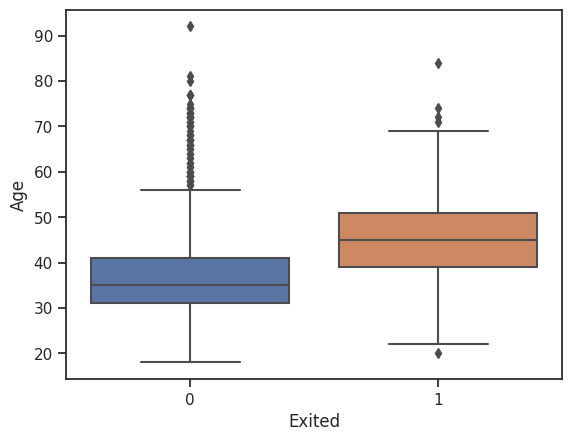

In [ ]:
sns.boxplot(x = 'Exited', y = 'Age', data = df_ea)

In [ ]:
## Are we able to correctly identify pockets of high-churn customer regions in feature space?
df_ea.Exited.value_counts(normalize=True).sort_index()
df_ea[(df_ea.Age > 42) & (df_ea.Age < 53)].Exited.value_counts(normalize=True).sort_index()
df_ea[(df_ea.Age > 42) & (df_ea.Age < 53)].y_pred.value_counts(normalize=True).sort_index()

0    0.795625
1    0.204375
Name: Exited, dtype: float64

0    0.570397
1    0.429603
Name: Exited, dtype: float64

0    0.487365
1    0.512635
Name: y_pred, dtype: float64

In [ ]:
## Checking correlation between features and target variable vs predicted variable
x = df_ea[num_feats + ['y_pred', 'Exited']].corr()
x[['y_pred','Exited']]

,y_pred,Exited
CreditScore,-0.030841,-0.032977
Age,0.377167,0.300468
Tenure,-0.016734,-0.028770
Balance,0.093414,0.112240
NumOfProducts,-0.114993,-0.060495
EstimatedSalary,-0.014970,0.044159
y_pred,1.000000,0.519078
Exited,0.519078,1.000000


#### Extracting the subset of incorrect predictions

All incorrect predictions are extracted and categorized into false positives (low precision) and false negatives (low recall)

In [ ]:
low_recall = df_ea[(df_ea.Exited == 1) & (df_ea.y_pred == 0)]
low_prec = df_ea[(df_ea.Exited == 0) & (df_ea.y_pred == 1)]
low_recall.shape
low_prec.shape
low_recall.head()
low_prec.head()

(128, 20)

(120, 20)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn,y_pred,y_pred_prob
6,698,1,57,6,136325.48,2,1,1,72549.27,1,1.0,0.0,0.0,0.444444,68162.705919,1.879074,0.105263,3.355482,0,0.230538
18,549,0,39,7,0.00,1,0,0,81259.25,1,0.0,0.0,1.0,0.205781,0.000000,0.000000,0.179487,1.285103,0,0.087083
40,702,1,26,5,56738.47,2,1,1,100442.22,1,1.0,0.0,0.0,0.111111,28369.220815,0.564887,0.192308,0.566558,0,0.159964
46,654,1,32,9,121455.65,1,1,0,190068.53,1,1.0,0.0,0.0,0.125000,121455.528544,0.639010,0.281250,0.707107,0,0.179728
53,506,0,57,6,0.00,2,0,1,194421.12,1,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.105263,0.000000,0,0.273887


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn,y_pred,y_pred_prob
5,601,0,54,1,131039.97,2,1,1,199661.50,0,0.0,1.0,0.0,0.000000,65519.952240,0.656311,0.018519,0.000000,1,0.747563
15,631,1,55,9,99685.06,1,1,0,114474.98,0,0.0,0.0,1.0,0.333333,99684.960315,0.870802,0.163636,2.472066,1,0.893586
24,676,1,48,3,80697.44,1,0,0,101397.86,0,0.0,1.0,0.0,0.166667,80697.359303,0.795850,0.062500,1.154701,1,0.638229
38,604,0,42,10,166031.45,1,1,0,98293.14,0,0.0,1.0,0.0,0.250000,166031.283969,1.689146,0.238095,1.620185,1,0.632205
41,586,0,42,2,0.00,1,1,0,102889.34,0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.047619,0.000000,1,0.728555


<Axes: xlabel='y_pred_prob', ylabel='Density'>

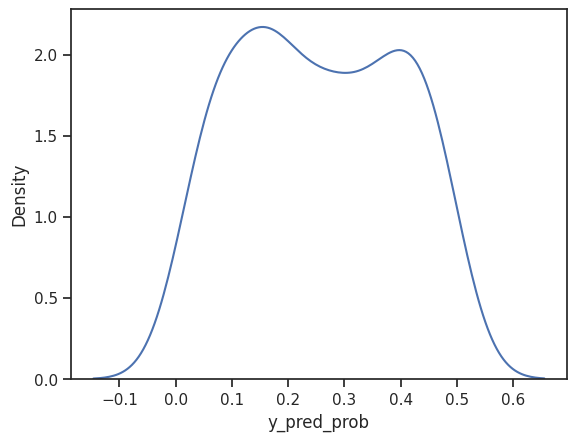

In [ ]:
## Prediction probabilty distribution of errors causing low recall
sns.distplot(low_recall.y_pred_prob, hist=False)

<Axes: xlabel='y_pred_prob', ylabel='Density'>

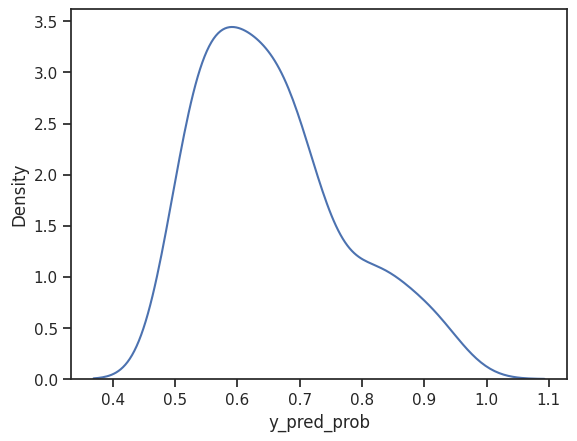

In [ ]:
## Prediction probabilty distribution of errors causing low precision
sns.distplot(low_prec.y_pred_prob, hist=False)

#### Tweaking the threshold of classifier

Any prediction above 0.5 belongs to the positive class and anything below 0.5 belongs to the negative class

In [ ]:
threshold = 0.5

In [ ]:
## Predict on validation set with adjustable decision threshold
probs = model.predict_proba(X_val)[:,1]
val_preds = np.where(probs > threshold, 1, 0)

In [ ]:
## Default params : 0.5 threshold
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

array([[1153,  120],
       [ 128,  199]])

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1273
           1       0.62      0.61      0.62       327

    accuracy                           0.84      1600
   macro avg       0.76      0.76      0.76      1600
weighted avg       0.84      0.84      0.84      1600



In [ ]:
## Tweaking threshold between 0.4 and 0.6
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

array([[1153,  120],
       [ 128,  199]])

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1273
           1       0.62      0.61      0.62       327

    accuracy                           0.84      1600
   macro avg       0.76      0.76      0.76      1600
weighted avg       0.84      0.84      0.84      1600



#### Checking for too much dependence on certain features

We'll compare a few important features : NumOfProducts, IsActiveMember, Age, Balance

In [ ]:
df_ea.NumOfProducts.value_counts(normalize=True).sort_index()
low_recall.NumOfProducts.value_counts(normalize=True).sort_index()
low_prec.NumOfProducts.value_counts(normalize=True).sort_index()

1    0.513750
2    0.456875
3    0.023750
4    0.005625
Name: NumOfProducts, dtype: float64

1    0.664062
2    0.335938
Name: NumOfProducts, dtype: float64

1    0.875000
2    0.091667
3    0.033333
Name: NumOfProducts, dtype: float64

In [ ]:
df_ea.IsActiveMember.value_counts(normalize=True).sort_index()
low_recall.IsActiveMember.value_counts(normalize=True).sort_index()
low_prec.IsActiveMember.value_counts(normalize=True).sort_index()

0    0.5
1    0.5
Name: IsActiveMember, dtype: float64

0    0.585938
1    0.414062
Name: IsActiveMember, dtype: float64

0    0.658333
1    0.341667
Name: IsActiveMember, dtype: float64

<Axes: ylabel='Age'>

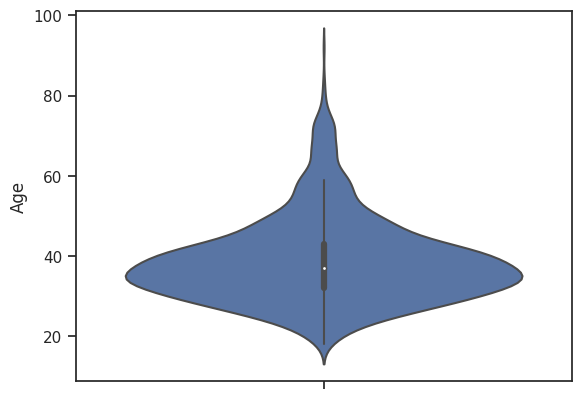

In [ ]:
sns.violinplot(y = df_ea.Age)

<Axes: ylabel='Age'>

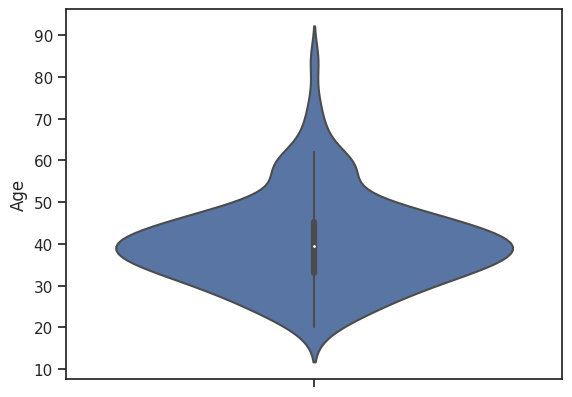

In [ ]:
sns.violinplot(y = low_recall.Age)

<Axes: ylabel='Age'>

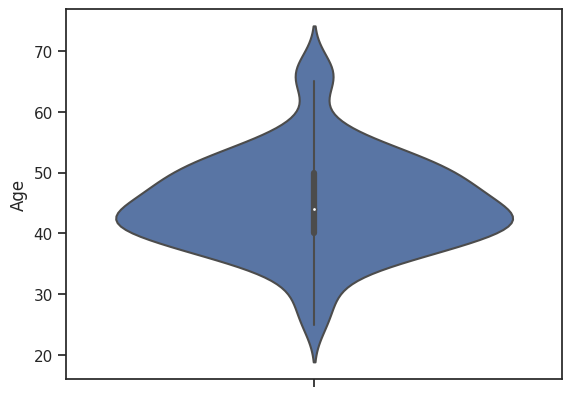

In [ ]:
sns.violinplot(y = low_prec.Age)

<Axes: ylabel='Balance'>

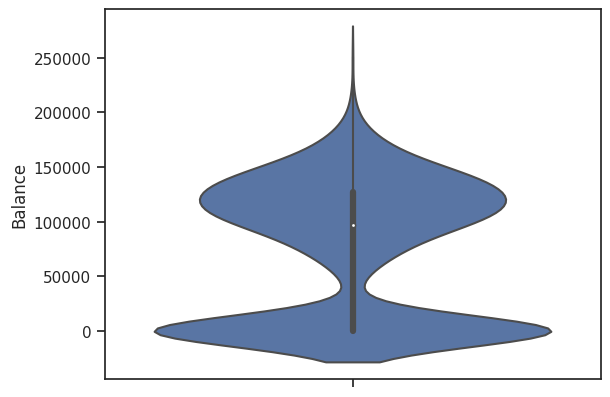

In [ ]:
sns.violinplot(y = df_ea.Balance)

<Axes: ylabel='Balance'>

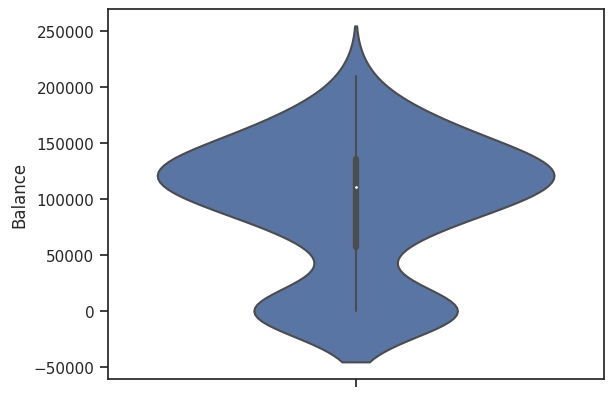

In [ ]:
sns.violinplot(y = low_recall.Balance)

<Axes: ylabel='Balance'>

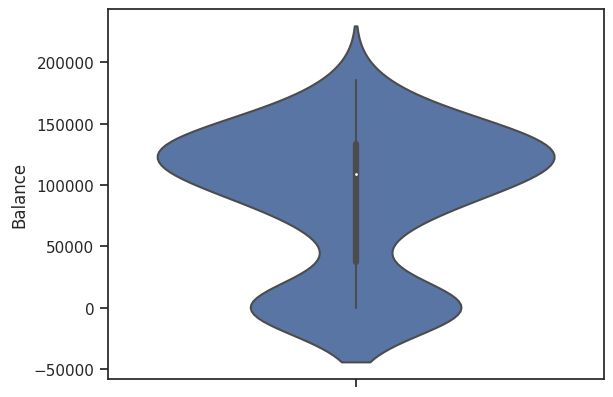

In [ ]:
sns.violinplot(y = low_prec.Balance)

### Train final, best model ; Save model and its parameters

In [ ]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report
import joblib

In [ ]:
## Re-defining X_train and X_val to consider original unscaled continuous features. y_train and y_val remain unaffected
X_train = df_train.drop(columns = ['Exited'], axis = 1)
X_val = df_val.drop(columns = ['Exited'], axis = 1)

X_train.shape, y_train.shape
X_val.shape, y_val.shape

((6400, 17), (6400,))

((1600, 17), (1600,))

In [ ]:
best_f1_lgb = LGBMClassifier(boosting_type = 'dart', class_weight = {0: 1, 1: 3.0}, min_child_samples = 20, n_jobs = - 1
                     , importance_type = 'gain', max_depth = 6, num_leaves = 63, colsample_bytree = 0.6, learning_rate = 0.1
                     , n_estimators = 201, reg_alpha = 1, reg_lambda = 1)

In [ ]:
best_recall_lgb = LGBMClassifier(boosting_type='dart', num_leaves=31, max_depth= 6, learning_rate=0.1, n_estimators = 21
                                 , class_weight= {0: 1, 1: 3.93}, min_child_samples=2, colsample_bytree=0.6, reg_alpha=0.3
                                 , reg_lambda=1.0, n_jobs=- 1, importance_type = 'gain')

In [ ]:
model = Pipeline(steps = [('categorical_encoding', CategoricalEncoder()),
                          ('add_new_features', AddFeatures()),
                          ('classifier', best_f1_lgb)
                         ])

In [ ]:
## Fitting final model on train dataset
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1317, number of negative: 5083
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437348 -> initscore=-0.251933
[LightGBM] [Info] Start training from score -0.251933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Pipeline(steps=[('categorical_encoding',
                 CategoricalEncoder(cols=[], lcols=[], ohecols=[], tcols=[])),
                ('add_new_features', AddFeatures()),
                ('classifier',
                 LGBMClassifier(boosting_type='dart',
                                class_weight={0: 1, 1: 3.0},
                                colsample_bytree=0.6, importance_type='gain',
                                max_depth=6, n_estimators=201, n_jobs=-1,
                                num_leaves=63, reg_alpha=1, reg_lambda=1))])

In [ ]:
# Predict target probabilities
val_probs = model.predict_proba(X_val)[:,1]

# Predict target values on val data
val_preds = np.where(val_probs > 0.45, 1, 0) # The probability threshold can be tweaked

In [ ]:
## Validation metrics
roc_auc_score(y_val, val_preds)
recall_score(y_val, val_preds)
confusion_matrix(y_val, val_preds)
print(classification_report(y_val, val_preds))

0.765677887722181

0.6452599388379205

array([[1128,  145],
       [ 116,  211]])

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1273
           1       0.59      0.65      0.62       327

    accuracy                           0.84      1600
   macro avg       0.75      0.77      0.76      1600
weighted avg       0.84      0.84      0.84      1600



In [ ]:
## Save model object
joblib.dump(model, 'final_churn_model_f1_0_45.sav')

['final_churn_model_f1_0_45.sav']

###SHAP

A mathematical method that explains the prediction of any machine learning model. It understands and debugs a model

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 3.4 MB/s eta 0:00:00


In [ ]:
import shap

shap.initjs()

In [ ]:
ce = CategoricalEncoder()
af = AddFeatures()

X = ce.fit_transform(X_train, y_train)
X = af.transform(X)

In [ ]:
X.shape
X.sample(5)

(6400, 18)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn,age_surname_enc
270,704,0,39,1,124640.51,1,1,0,116511.12,0.0,1.0,0.0,0.428571,124640.385360,1.069774,0.025641,2.676428,2.676428
3310,512,1,33,3,176666.62,1,1,0,94670.77,0.0,0.0,1.0,0.400000,176666.443334,1.866116,0.090909,2.297825,2.297825
1270,589,1,32,2,0.00,2,0,1,9468.64,1.0,0.0,0.0,0.200000,0.000000,0.000000,0.062500,1.131371,1.131371
1881,850,0,34,9,92899.27,2,1,0,97465.89,1.0,0.0,0.0,0.000000,46449.611775,0.953146,0.264706,0.000000,0.000000
1174,577,1,43,3,0.00,2,1,1,135008.92,0.0,0.0,1.0,0.500000,0.000000,0.000000,0.069767,3.278719,3.278719


In [ ]:
best_f1_lgb.fit(X, y_train)

[LightGBM] [Info] Number of positive: 1317, number of negative: 5083
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2182
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.437348 -> initscore=-0.251933
[LightGBM] [Info] Start training from score -0.251933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMClassifier(boosting_type='dart', class_weight={0: 1, 1: 3.0},
               colsample_bytree=0.6, importance_type='gain', max_depth=6,
               n_estimators=201, n_jobs=-1, num_leaves=63, reg_alpha=1,
               reg_lambda=1)

In [ ]:
explainer = shap.TreeExplainer(best_f1_lgb)

In [ ]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn,age_surname_enc
0,365,1,30,0,127760.07,1,1,0,81537.85,0.0,1.0,0.0,1.000000,127759.942240,1.566881,0.000000,5.477226,5.477226
1,553,1,38,1,181110.13,2,1,0,184544.59,0.0,0.0,1.0,0.500000,90555.019722,0.981390,0.026316,3.082207,3.082207
2,778,0,29,6,150358.97,1,1,0,62454.01,0.0,1.0,0.0,0.250000,150358.819641,2.407515,0.206897,1.346291,1.346291
3,850,1,42,0,0.00,2,1,0,44165.84,1.0,0.0,0.0,0.285714,0.000000,0.000000,0.000000,1.851640,1.851640
4,674,0,36,6,100762.64,1,1,0,182156.86,0.0,1.0,0.0,0.285714,100762.539237,0.553164,0.166667,1.714286,1.714286
5,470,0,48,6,140576.11,1,1,1,116971.05,0.0,0.0,1.0,0.000000,140575.969424,1.201803,0.125000,0.000000,0.000000
6,738,1,49,3,0.00,3,1,1,65066.48,0.0,0.0,1.0,0.300000,0.000000,0.000000,0.061224,2.100000,2.100000
7,604,1,34,7,0.00,2,1,1,188078.55,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.205882,0.000000,0.000000
8,635,0,48,4,81556.89,2,1,0,191914.37,0.0,1.0,0.0,0.250000,40778.424611,0.424965,0.083333,1.732051,1.732051
9,730,1,38,5,118866.36,1,1,1,163317.50,0.0,0.0,1.0,0.205813,118866.241134,0.727824,0.131579,1.268719,1.268719


In [ ]:
row_num = 7
shap_vals = explainer.shap_values(X.iloc[row_num].values.reshape(1,-1))

In [ ]:
#base value
explainer.expected_value

[1.1652156183905347, -1.1652156183905347]

In [ ]:
## Explain single prediction
shap.force_plot(explainer.expected_value[1], shap_vals[1], X.iloc[row_num], link = 'logit')

In [ ]:
## Check probability predictions through the model
pred_probs = best_f1_lgb.predict_proba(X)[:,1]
pred_probs[row_num]

0.039981923311643124

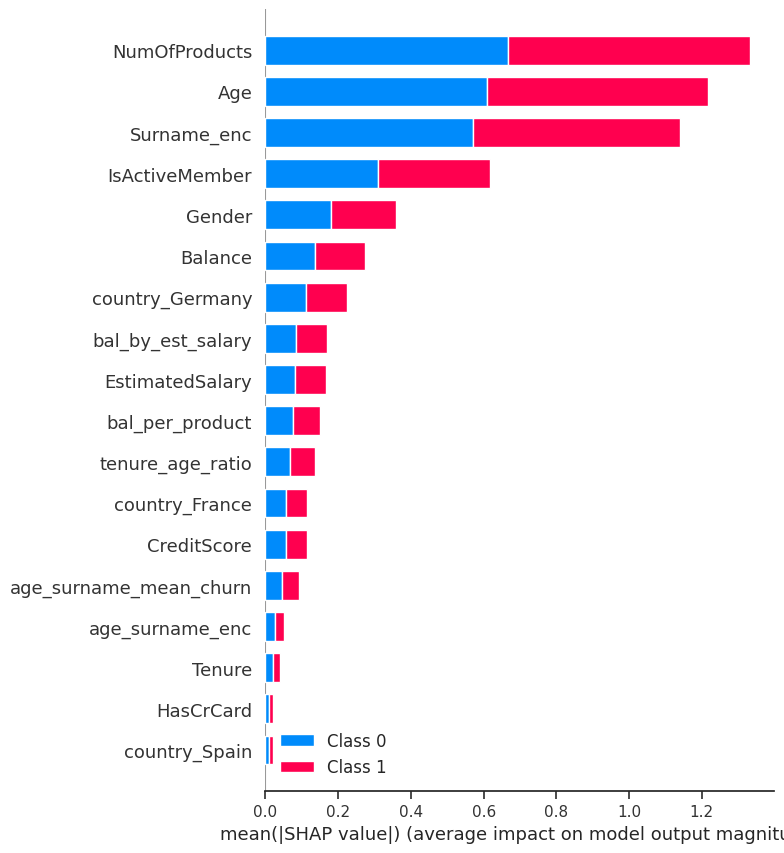

In [ ]:
## Explain global patterns/ summary stats
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

### Load saved model and make predictions on unseen/future data

Here, we'll use df_test as the unseen, future data

In [ ]:
import joblib

In [ ]:
## Load model object
model = joblib.load('final_churn_model_f1_0_45.sav')

In [ ]:
X_test = df_test.drop(columns = ['Exited'], axis = 1)
X_test.shape
y_test.shape

(2000, 17)

(2000,)

In [ ]:
## Predict target probabilities
test_probs = model.predict_proba(X_test)[:,1]

In [ ]:
## Predict target values on test data
test_preds = np.where(test_probs > 0.45, 1, 0) # Flexibility to tweak the probability threshold
#test_preds = model.predict(X_test)

In [ ]:
## Test set metrics
roc_auc_score(y_test, test_preds)
recall_score(y_test, test_preds)
confusion_matrix(y_test, test_preds)
print(classification_report(y_test, test_preds))

0.7438765832054735

0.6234096692111959

array([[1389,  218],
       [ 148,  245]])

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1607
           1       0.53      0.62      0.57       393

    accuracy                           0.82      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.83      0.82      0.82      2000



In [ ]:
## Adding predictions and their probabilities in the original test dataframe
test = df_test.copy()
test['predictions'] = test_preds
test['pred_probabilities'] = test_probs

In [ ]:
test.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn,predictions,pred_probabilities
601,688,0,46,3,0.00,2,0,1,104902.68,0,0.0,0.0,1.0,0.205781,0.000000,0.000000,0.065217,1.395676,0,0.016482
312,539,1,39,1,0.00,1,1,1,28184.70,0,1.0,0.0,0.0,0.250000,0.000000,0.000000,0.025641,1.561249,0,0.375501
571,461,0,25,6,0.00,2,1,1,15306.29,0,0.0,0.0,1.0,0.230769,0.000000,0.000000,0.240000,1.153846,0,0.129513
1454,850,1,49,8,0.00,1,0,0,25867.67,1,0.0,0.0,1.0,0.205781,0.000000,0.000000,0.163265,1.440469,0,0.302518
1130,564,1,40,4,0.00,1,1,0,85455.62,1,1.0,0.0,0.0,0.205781,0.000000,0.000000,0.100000,1.301475,0,0.073358
1244,634,1,74,5,108891.70,1,1,0,10078.02,0,0.0,1.0,0.0,0.000000,108891.591108,10.804870,0.067568,0.000000,1,0.806038
379,545,1,23,2,0.00,2,1,0,189613.12,0,1.0,0.0,0.0,0.600000,0.000000,0.000000,0.086957,2.877499,0,0.054965
817,733,0,44,6,168165.84,1,0,1,197193.49,0,1.0,0.0,0.0,0.083333,168165.671834,0.852796,0.136364,0.552771,0,0.434566
164,744,1,31,9,120718.28,1,1,1,58961.49,0,1.0,0.0,0.0,0.333333,120718.159282,2.047409,0.290323,1.855921,0,0.103085
1219,674,1,36,2,154525.70,1,0,1,27468.72,0,1.0,0.0,0.0,1.000000,154525.545474,5.625515,0.055556,6.000000,0,0.097301


#### Creating a list of customers who are the most likely to churn

Listing customers who have a churn probability higher than 70%. These are the ones who can be targeted immediately

In [ ]:
high_churn_list = test[test.pred_probabilities > 0.7].sort_values(by = ['pred_probabilities'], ascending = False
                                                                 ).reset_index().drop(columns = ['index', 'Exited', 'predictions'], axis = 1)

In [ ]:
high_churn_list.shape
high_churn_list.head()

(209, 18)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn,pred_probabilities
0,834,0,57,8,112281.60,3,1,0,140225.14,0.0,1.0,0.0,0.333333,37427.187524,0.800724,0.140351,2.516611,0.995527
1,705,0,54,3,125889.30,3,1,0,96013.50,0.0,1.0,0.0,0.333333,41963.086012,1.311162,0.055556,2.449490,0.993624
2,546,0,58,3,106458.31,4,1,0,128881.87,0.0,1.0,0.0,0.000000,26614.570846,0.826015,0.051724,0.000000,0.987746
3,547,1,55,4,111362.76,3,1,0,16922.28,0.0,1.0,0.0,0.166667,37120.907626,6.580837,0.072727,1.236033,0.985104
4,629,0,45,7,129818.39,3,1,0,9217.55,0.0,1.0,0.0,0.375000,43272.782242,14.083828,0.155556,2.515576,0.984677


In [ ]:
high_churn_list.to_csv('high_churn_list.csv', index = False)

#### Feature-based user segments from the above list
Based on business requirements, a prioritization matrix can be defined, wherein certain segments of customers are targeted first. These segments can be defined based on insights through data or the business teams' requirements.
E.g. Males who are an ActiveMember, have a CreditCard and are from Germany can be prioritized first because the business potentially sees the max. ROI from them

### Ending notes

#### Note on common issues with a model in production

- Data drift / Covariate shift

- Importance of incremental training

- Ensure parity between training and testing environments (model and library versions etc.)

- Tracking core business metrics

- Creation and monitoring of metrics of specific user segments

- Highlight impact to business folks : Through visualizations, Model can potentially reduce the Churn rate by 30-40% etc.

#### Future steps

 - The model can be expanded to predict when will a customer churn. This will further help sales/customer service teams to reduce churn rate by targeting the right customers at the right time